<a href="https://colab.research.google.com/github/JoaoTeles87/Image-Classification-in-Production-line/blob/main/Model_2_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project with ResNet50 Transfer Learning Model for Single Image

In [ ]:
# installation of necessary packages
%pip install xmltodict
%pip install tensorflow matplotlib opencv-python tf-explain lxml xmltodict --no-cache-dir


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install scikit-learn --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


## Checking the correct use of the directory

In [ ]:
import os
os.getcwd()


'c:\\Users\\joaoa\\Image-Classification-in-Production-line\\Image-Classification-in-Production-line\\.ipynb_checkpoints'

In [ ]:
os.chdir("c:\\Users\\joaoa\\Image-Classification-in-Production-line\\Image-Classification-in-Production-line")


In [ ]:
os.listdir(".")


['.git',
 '.ipynb_checkpoints',
 '.venv',
 'best_cnn_model.h5',
 'cam_supervised_model_final.h5',
 'damaged',
 'data_top',
 'heatmaps',
 'heatmaps_top',
 'intact',
 'interpretabilidade',
 'Model_1_EfficientNet.ipynb',
 'README.md',
 'training']

## First constructed pipeline

In [ ]:
import os
import shutil

os.makedirs("data_top/damaged", exist_ok=True)
os.makedirs("data_top/intact", exist_ok=True)

# Copy all images from top/
for class_label in ["damaged", "intact"]:
    source_dir = os.path.join(class_label, "top")
    target_dir = os.path.join("data_top", class_label)

    for f in os.listdir(source_dir):
        if f.endswith(".png"):
            shutil.copy(os.path.join(source_dir, f), os.path.join(target_dir, f))


In [ ]:
# 1. IMPORTAÇÃO DE BIBLIOTECAS
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# 2. CONFIGURAÇÃO
img_size = (224, 224)
batch_size = 16
base_dir = "data_top"  # Contém damaged/ e intact/

# 3. DATAGEN E LOADERS
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# 4. MODELO TRANSFER LEARNING
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Congelar base
for layer in base_model.layers:
    layer.trainable = False

# Compilar
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 5. TREINAR
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


Found 144 images belonging to 2 classes.


Found 36 images belonging to 2 classes.


c:\Users\joaoa\Image-Classification-in-Production-line\Image-Classification-in-Production-line\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4713 - loss: 0.8639 - val_accuracy: 0.4722 - val_loss: 0.7527
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4713 - loss: 0.8639 - val_accuracy: 0.4722 - val_loss: 0.7527
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 855ms/step - accuracy: 0.5162 - loss: 0.7254 - val_accuracy: 0.5278 - val_loss: 0.7380
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 855ms/step - accuracy: 0.5162 - loss: 0.7254 - val_accuracy: 0.5278 - val_loss: 0.7380
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 821ms/step - accuracy: 0.5349 - loss: 0.7050 - val_accuracy: 0.5000 - val_loss: 0.7235
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 821ms/step - accuracy: 0.5349 - loss: 0.7050 - val_accuracy: 0.5000 - val_loss: 0.7235
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 899ms/step - accuracy: 0.5648 - loss: 0.6919 - val_accuracy: 0.5556 - val_loss: 0.7166
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 899ms/step - accuracy: 0.5648 - loss: 0.6919 - val_accuracy: 0.5556 - val_loss: 0.7


Processando 0101069901524_top...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Previsão: 0.5766 → DANIFICADO
Previsão: 0.5766 → DANIFICADO
IoU: 0.00

[RESULTADO FINAL]
Média IoU: 0.0000
Proporção IoU > 0.5: 0.00%
IoU: 0.00

[RESULTADO FINAL]
Média IoU: 0.0000
Proporção IoU > 0.5: 0.00%


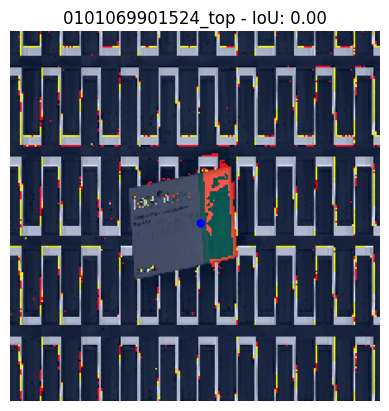


Processando 0105413725474_top...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Previsão: 0.2987 → INTOCADO

Processando 0109451226527_top...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/stepPrevisão: 0.2987 → INTOCADO

Processando 0109451226527_top...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Previsão: 0.3061 → INTOCADO

Processando 0111632059302_top...
Previsão: 0.3061 → INTOCADO

Processando 0111632059302_top...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Previsão: 0.5075 → DANIFICADO
Previsão: 0.5075 → DANIFICADO
IoU: 0.00

[RESULTADO FINAL]
Média IoU: 0.0000
Proporção IoU > 0.5: 0.00%
IoU: 0.00

[RESULTADO FINAL]
Média IoU: 0.0000
Proporção IoU > 0.5: 0.00%


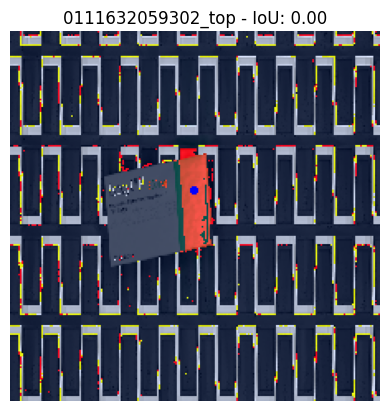


Processando 0118055224146_top...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Previsão: 0.6510 → DANIFICADO
Previsão: 0.6510 → DANIFICADO
IoU: 0.00

[RESULTADO FINAL]
Média IoU: 0.0000
Proporção IoU > 0.5: 0.00%
IoU: 0.00

[RESULTADO FINAL]
Média IoU: 0.0000
Proporção IoU > 0.5: 0.00%


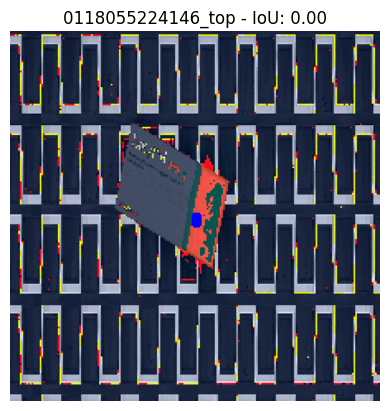

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
from tf_explain.core.integrated_gradients import IntegratedGradients
from tensorflow.keras.applications.resnet import preprocess_input
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
import os
import cv2
import glob

def extract_gt_bbox(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    bbox = root.find(".//bndbox")
    if bbox is not None:
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)
        return (xmin, ymin, xmax, ymax)
    return None

def heatmap_to_bbox(heatmap, threshold_ratio=0.1):
    """
    Converte um heatmap (grayscale) em bounding box com base no limiar.
    """
    if len(heatmap.shape) == 3 and heatmap.shape[2] == 3:
        gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
    else:
        gray = heatmap  # já é grayscale

    _, thresh = cv2.threshold(gray, int(threshold_ratio * 255), 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        return (x, y, x + w, y + h)
    return None


def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    return interArea / float(boxAArea + boxBArea - interArea)

# heatmap + bbox + iou
ious = []
image_paths = sorted(glob.glob("interpretabilidade/damaged/top/*.png"))[:5]

for img_path in image_paths:
    serial = os.path.basename(img_path).replace(".png", "")
    print(f"\nProcessando {serial}...")

    # carregar imagem e preprocessar
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_input = preprocess_input(np.expand_dims(img_array, axis=0))

    # prever com modelo
    pred = model.predict(img_input)[0][0]
    print(f"Previsão: {pred:.4f} → {'DANIFICADO' if pred > 0.5 else 'INTOCADO'}")
    if pred <= 0.5:
        continue

    # gerar heatmap
    explainer = IntegratedGradients()
    heatmap = explainer.explain((img_input, None), model, class_index=0)
    cv2.imwrite(f"heatmaps_top/{serial}.png", heatmap)

    # bounding box prevista
    pred_bbox = heatmap_to_bbox(heatmap)
    if pred_bbox is None:
        print("Nenhuma bbox prevista encontrada.")
        continue

    # bounding box real
    xml_path = f"interpretabilidade/damaged/top/{serial}.xml"
    if not os.path.exists(xml_path):
        print("XML não encontrado.")
        continue

    gt_bbox = extract_gt_bbox(xml_path)
    if gt_bbox is None:
        print("BBox real inválida.")
        continue

    # calcular IoU
    iou = compute_iou(pred_bbox, gt_bbox)
    print(f"IoU: {iou:.2f}")
    ious.append((serial, iou))
    if ious:
        iou_vals = [x[1] for x in ious]
        print(f"\n[RESULTADO FINAL]")
        print(f"Média IoU: {np.mean(iou_vals):.4f}")
        print(f"Proporção IoU > 0.5: {np.mean(np.array(iou_vals) > 0.5):.2%}")
                # Visualização (opcional)
        img_copy = img_array.astype(np.uint8).copy()
        cv2.rectangle(img_copy, (gt_bbox[0], gt_bbox[1]), (gt_bbox[2], gt_bbox[3]), (0, 255, 0), 2)  # GT
        cv2.rectangle(img_copy, (pred_bbox[0], pred_bbox[1]), (pred_bbox[2], pred_bbox[3]), (0, 0, 255), 2)  # Pred
        plt.imshow(img_copy)
        plt.title(f"{serial} - IoU: {iou:.2f}")
        plt.axis("off")
        plt.show()




### Conclusion: heatmap generated is weak and diffuse. Most of the right attempts were due to other aspects such as position, color and lighting.


[INFO] Processando: 0101069901524_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Previsão: 0.5766 → Classe: 1 (DANIFICADO)
Previsão: 0.5766 → Classe: 1 (DANIFICADO)
[WARN] Nenhuma bbox predita encontrada.

[INFO] Processando: 0105413725474_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Previsão: 0.2987 → Classe: 0 (INTOCADO)

[INFO] Processando: 0109451226527_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Previsão: 0.3061 → Classe: 0 (INTOCADO)

[INFO] Processando: 0111632059302_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step[WARN] Nenhuma bbox predita encontrada.

[INFO] Processando: 0105413725474_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Previsão: 0.2987 → Classe: 0 (INTOCADO)

[INFO] Processando: 0109451226527_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Previsão: 0.3061 → Classe: 0 (INTOCADO)

[INFO] Processando: 0111632059302_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Previsão: 0.5075 → Classe: 1 (DANIFICADO)
Previsão: 0.5075 → C

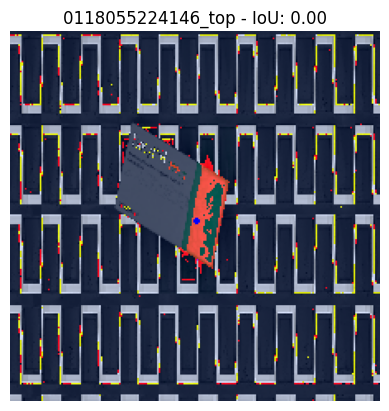


[INFO] Processando: 0120928945494_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Previsão: 0.4984 → Classe: 0 (INTOCADO)

[INFO] Processando: 0122691608037_top
Previsão: 0.4984 → Classe: 0 (INTOCADO)

[INFO] Processando: 0122691608037_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Previsão: 0.6293 → Classe: 1 (DANIFICADO)
Previsão: 0.6293 → Classe: 1 (DANIFICADO)
IoU: 0.00
IoU: 0.00


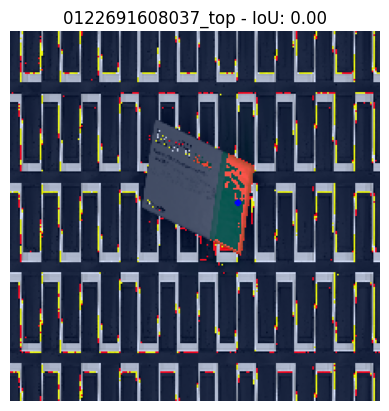


[INFO] Processando: 0123374171704_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Previsão: 0.3515 → Classe: 0 (INTOCADO)

[INFO] Processando: 0129768769736_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/stepPrevisão: 0.3515 → Classe: 0 (INTOCADO)

[INFO] Processando: 0129768769736_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Previsão: 0.4108 → Classe: 0 (INTOCADO)

[INFO] Processando: 0163723873967_top
Previsão: 0.4108 → Classe: 0 (INTOCADO)

[INFO] Processando: 0163723873967_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Previsão: 0.2777 → Classe: 0 (INTOCADO)

[RESULTADO FINAL]
Média IoU: 0.0000
Proporção IoU > 0.5: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Previsão: 0.2777 → Classe: 0 (INTOCADO)

[RESULTADO FINAL]
Média IoU: 0.0000
Proporção IoU > 0.5: 0.00%


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tf_explain.core.integrated_gradients import IntegratedGradients
from tensorflow.keras.applications.resnet import preprocess_input
import xml.etree.ElementTree as ET
import cv2
import glob

def extract_gt_bbox(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    bbox = root.find(".//bndbox")
    if bbox is not None:
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)
        return (xmin, ymin, xmax, ymax)
    return None

def heatmap_to_bbox(heatmap, threshold_ratio=0.2):
    if len(heatmap.shape) == 3 and heatmap.shape[2] == 3:
        gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
    else:
        gray = heatmap
    _, thresh = cv2.threshold(gray, int(threshold_ratio * 255), 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        return (x, y, x + w, y + h)
    return None

def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = max(1, (boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = max(1, (boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))
    return interArea / float(boxAArea + boxBArea - interArea + 1e-6)

# Carregar modelo previamente treinado

# Avaliar algumas imagens
image_paths = sorted(glob.glob("interpretabilidade/damaged/top/*.png"))[:10]
ious = []

for img_path in image_paths:
    serial = os.path.basename(img_path).replace(".png", "")
    print(f"\n[INFO] Processando: {serial}")

    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_input = preprocess_input(np.expand_dims(img_array, axis=0))

    pred = model.predict(img_input)[0][0]
    print(f"Previsão: {pred:.4f} → Classe: {'1 (DANIFICADO)' if pred > 0.5 else '0 (INTOCADO)'}")

    if pred <= 0.5:
        continue

    explainer = IntegratedGradients()
    heatmap = explainer.explain((img_input, None), model, class_index=0)
    os.makedirs("heatmaps_top", exist_ok=True)
    cv2.imwrite(f"heatmaps_top/{serial}.png", heatmap)

    pred_bbox = heatmap_to_bbox(heatmap, threshold_ratio=0.2)
    if pred_bbox is None:
        print("[WARN] Nenhuma bbox predita encontrada.")
        continue

    xml_path = f"interpretabilidade/damaged/top/{serial}.xml"
    if not os.path.exists(xml_path):
        print("[WARN] XML não encontrado.")
        continue

    gt_bbox = extract_gt_bbox(xml_path)
    if gt_bbox is None:
        print("[WARN] BBox GT inválida.")
        continue

    iou = compute_iou(pred_bbox, gt_bbox)
    print(f"IoU: {iou:.2f}")
    ious.append((serial, iou))

    # Visualizar
    img_vis = img_array.astype(np.uint8).copy()
    cv2.rectangle(img_vis, (gt_bbox[0], gt_bbox[1]), (gt_bbox[2], gt_bbox[3]), (0, 255, 0), 2)
    cv2.rectangle(img_vis, (pred_bbox[0], pred_bbox[1]), (pred_bbox[2], pred_bbox[3]), (0, 0, 255), 2)
    plt.imshow(img_vis)
    plt.title(f"{serial} - IoU: {iou:.2f}")
    plt.axis("off")
    plt.show()

# Estatísticas finais
if ious:
    iou_vals = [x[1] for x in ious]
    print(f"\n[RESULTADO FINAL]")
    print(f"Média IoU: {np.mean(iou_vals):.4f}")
    print(f"Proporção IoU > 0.5: {np.mean(np.array(iou_vals) > 0.5):.2%}")



[INFO] Processando: 0101069901524_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Previsão: 0.5766 → Classe: 1 (DANIFICADO)
Previsão: 0.5766 → Classe: 1 (DANIFICADO)
[WARN] Nenhuma bbox predita encontrada.

[INFO] Processando: 0105413725474_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[WARN] Nenhuma bbox predita encontrada.

[INFO] Processando: 0105413725474_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Previsão: 0.2987 → Classe: 0 (INTOCADO)

[INFO] Processando: 0109451226527_top
Previsão: 0.2987 → Classe: 0 (INTOCADO)

[INFO] Processando: 0109451226527_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Previsão: 0.3061 → Classe: 0 (INTOCADO)

[INFO] Processando: 0111632059302_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/stepPrevisão: 0.3061 → Classe: 0 (INTOCADO)

[INFO] Processando: 0111632059302_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Previsão: 0.5075 → Classe: 1 (DANIFICADO)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Previsão: 0.5075 → C

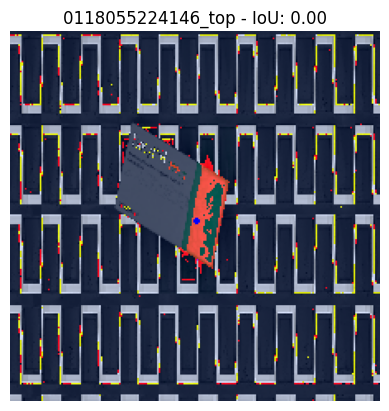


[INFO] Processando: 0120928945494_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Previsão: 0.4984 → Classe: 0 (INTOCADO)

[INFO] Processando: 0122691608037_top
Previsão: 0.4984 → Classe: 0 (INTOCADO)

[INFO] Processando: 0122691608037_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Previsão: 0.6293 → Classe: 1 (DANIFICADO)
Previsão: 0.6293 → Classe: 1 (DANIFICADO)
IoU: 0.00
IoU: 0.00


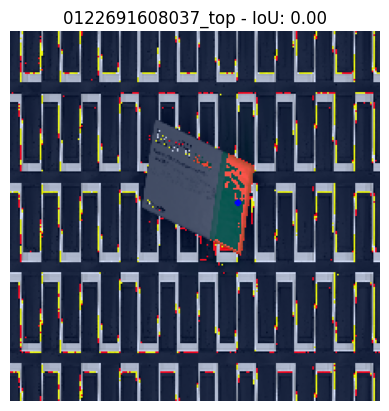


[INFO] Processando: 0123374171704_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Previsão: 0.3515 → Classe: 0 (INTOCADO)

[INFO] Processando: 0129768769736_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Previsão: 0.3515 → Classe: 0 (INTOCADO)

[INFO] Processando: 0129768769736_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Previsão: 0.4108 → Classe: 0 (INTOCADO)

[INFO] Processando: 0163723873967_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/stepPrevisão: 0.4108 → Classe: 0 (INTOCADO)

[INFO] Processando: 0163723873967_top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tf_explain.core.integrated_gradients import IntegratedGradients
from tensorflow.keras.applications.resnet import preprocess_input
import xml.etree.ElementTree as ET
import cv2
import glob

def extract_gt_bbox(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    bbox = root.find(".//bndbox")
    if bbox is not None:
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)
        return (xmin, ymin, xmax, ymax)
    return None

def heatmap_to_bbox(heatmap, threshold_ratio=0.2):
    if len(heatmap.shape) == 3 and heatmap.shape[2] == 3:
        gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
    else:
        gray = heatmap
    _, thresh = cv2.threshold(gray, int(threshold_ratio * 255), 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        return (x, y, x + w, y + h)
    return None

def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = max(1, (boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = max(1, (boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))
    return interArea / float(boxAArea + boxBArea - interArea + 1e-6)

# Carregar modelo previamente treinado

# Avaliar algumas imagens
image_paths = sorted(glob.glob("interpretabilidade/damaged/top/*.png"))[:10]
ious = []

for img_path in image_paths:
    serial = os.path.basename(img_path).replace(".png", "")
    print(f"\n[INFO] Processando: {serial}")

    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_input = preprocess_input(np.expand_dims(img_array, axis=0))

    pred = model.predict(img_input)[0][0]
    print(f"Previsão: {pred:.4f} → Classe: {'1 (DANIFICADO)' if pred > 0.5 else '0 (INTOCADO)'}")

    if pred <= 0.5:
        continue

    explainer = IntegratedGradients()
    heatmap = explainer.explain((img_input, None), model, class_index=0)
    os.makedirs("heatmaps_top", exist_ok=True)
    cv2.imwrite(f"heatmaps_top/{serial}.png", heatmap)

    pred_bbox = heatmap_to_bbox(heatmap, threshold_ratio=0.2)
    if pred_bbox is None:
        print("[WARN] Nenhuma bbox predita encontrada.")
        continue

    xml_path = f"interpretabilidade/damaged/top/{serial}.xml"
    if not os.path.exists(xml_path):
        print("[WARN] XML não encontrado.")
        continue

    gt_bbox = extract_gt_bbox(xml_path)
    if gt_bbox is None:
        print("[WARN] BBox GT inválida.")
        continue

    iou = compute_iou(pred_bbox, gt_bbox)
    print(f"IoU: {iou:.2f}")
    ious.append((serial, iou))

    # Visualizar
    img_vis = img_array.astype(np.uint8).copy()
    cv2.rectangle(img_vis, (gt_bbox[0], gt_bbox[1]), (gt_bbox[2], gt_bbox[3]), (0, 255, 0), 2)
    cv2.rectangle(img_vis, (pred_bbox[0], pred_bbox[1]), (pred_bbox[2], pred_bbox[3]), (0, 0, 255), 2)
    plt.imshow(img_vis)
    plt.title(f"{serial} - IoU: {iou:.2f}")
    plt.axis("off")
    plt.show()

# Estatísticas finais
if ious:
    iou_vals = [x[1] for x in ious]
    print(f"\n[RESULTADO FINAL]")
    print(f"Média IoU: {np.mean(iou_vals):.4f}")
    print(f"Proporção IoU > 0.5: {np.mean(np.array(iou_vals) > 0.5):.2%}")



# Pipeline for the Multi-Input CNN Modelreferente ao Modelo com Multi-Input CNN

In [ ]:
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

class MultiInputDataGenerator(Sequence):
    def __init__(self, file_pairs, labels, batch_size=16, img_size=(224, 224), shuffle=True):
        self.file_pairs = file_pairs  # list of (top_path, side_path)
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.file_pairs) / self.batch_size))

    def __getitem__(self, index):
        batch_pairs = self.file_pairs[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]

        top_imgs = []
        side_imgs = []
        for top_path, side_path in batch_pairs:
            top_img = load_img(top_path, target_size=self.img_size)
            side_img = load_img(side_path, target_size=self.img_size)
            top_imgs.append(img_to_array(top_img))
            side_imgs.append(img_to_array(side_img))

        X_top = tf.keras.applications.resnet.preprocess_input(np.array(top_imgs))
        X_side = tf.keras.applications.resnet.preprocess_input(np.array(side_imgs))
        y = np.array(batch_labels)

        return [X_top, X_side], y

    def on_epoch_end(self):
        if self.shuffle:
            temp = list(zip(self.file_pairs, self.labels))
            np.random.shuffle(temp)
            self.file_pairs, self.labels = zip(*temp)

# Construir pares de arquivos
def build_file_pairs_and_labels(base_dir):
    top_dir = lambda c: os.path.join(base_dir, c, "top")
    side_dir = lambda c: os.path.join(base_dir, c, "side")

    file_pairs = []
    labels = []

    for label, category in enumerate(["intact", "damaged"]):
        top_files = os.listdir(top_dir(category))
        for f in top_files:
            serial = f.replace("_top.png", "").replace(".png", "")
            top_path = os.path.join(top_dir(category), f)
            side_path = os.path.join(side_dir(category), f.replace("top", "side"))
            if os.path.exists(top_path) and os.path.exists(side_path):
                file_pairs.append((top_path, side_path))
                labels.append(label)

    return file_pairs, labels

# Montar conjuntos
file_pairs, labels = build_file_pairs_and_labels("c:/Users/joaoa/Image-Classification-in-Production-line/Image-Classification-in-Production-line/training")
train_pairs, val_pairs, train_labels, val_labels = train_test_split(file_pairs, labels, test_size=0.2, stratify=labels, random_state=42)

# Geradores
train_gen = MultiInputDataGenerator(train_pairs, train_labels)
val_gen = MultiInputDataGenerator(val_pairs, val_labels)

len(train_gen), len(val_gen)


(9, 3)

In [ ]:
import os

def check_data_loading(path):
    damaged_side = os.listdir(os.path.join(path, "damaged/side"))
    damaged_top = os.listdir(os.path.join(path, "damaged/top"))
    intact_side = os.listdir(os.path.join(path, "intact/side"))
    intact_top = os.listdir(os.path.join(path, "intact/top"))

    print(f"[INFO] Imagens 'damaged/side': {len([f for f in damaged_side if f.endswith('.png')])}")
    print(f"[INFO] Imagens 'damaged/top': {len([f for f in damaged_top if f.endswith('.png')])}")
    print(f"[INFO] Imagens 'intact/side': {len([f for f in intact_side if f.endswith('.png')])}")
    print(f"[INFO] Imagens 'intact/top': {len([f for f in intact_top if f.endswith('.png')])}")

check_data_loading("c:/Users/joaoa/Image-Classification-in-Production-line/Image-Classification-in-Production-line/training")


[INFO] Imagens 'damaged/side': 90
[INFO] Imagens 'damaged/top': 90
[INFO] Imagens 'intact/side': 90
[INFO] Imagens 'intact/top': 90


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Entradas
input_top = Input(shape=(224, 224, 3), name='top_input')
input_side = Input(shape=(224, 224, 3), name='side_input')

# Backbone ResNet50 compartilhado
backbone = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
backbone.trainable = False

# Aplicação do backbone
x_top = backbone(input_top)
x_side = backbone(input_side)

# Pooling e concatenação
x_top = GlobalAveragePooling2D()(x_top)
x_side = GlobalAveragePooling2D()(x_side)
x = Concatenate()([x_top, x_side])

# Camadas densas
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Modelo final
model = Model(inputs=[input_top, input_side], outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ top_input           │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ side_input          │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ top_input[0][0],  │
│ (Functional)        │ 2048)             │            │ side_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[1][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 4096)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │    524,416 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        129 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,112,257 (91.98 MB)

 Trainable params: 524,545 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Backbone: Pre-trained ResNet50 (trainable=False)

### Poolings: GlobalAveragePooling separately for top and side
###
### Concatenation: top + side → Dense(128) → Dense(1)
###
### Trainable: Only the classifier (last 2 layers)
###
### Trainable parameters: 524k → fast training

In [ ]:
def load_and_preprocess_image(path, target_size):
    img = tf.keras.preprocessing.image.load_img(path, target_size=target_size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = preprocess_input(img)
    return img


In [ ]:
class MultiViewDataGenerator(Sequence):
    def __init__(self, file_pairs, labels, batch_size=16, img_size=(224, 224), shuffle=True, **kwargs):
        super().__init__(**kwargs)  # <-- ESSENCIAL
        self.file_pairs = file_pairs
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.file_pairs))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.file_pairs) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)


    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_pairs = [self.file_pairs[k] for k in indexes]
        batch_labels = [self.labels[k] for k in indexes]

        top_imgs = []
        side_imgs = []

        for top_path, side_path in batch_pairs:
            top_img = load_and_preprocess_image(top_path, self.img_size)
            side_img = load_and_preprocess_image(side_path, self.img_size)
            top_imgs.append(top_img)
            side_imgs.append(side_img)

        return {
                    "top_input": np.array(top_imgs),
                    "side_input": np.array(side_imgs)
                }, np.array(batch_labels)


In [ ]:
train_generator = MultiViewDataGenerator(train_pairs, train_labels, batch_size=16, img_size=(224,224), shuffle=True)
val_generator = MultiViewDataGenerator(val_pairs, val_labels, batch_size=16, img_size=(224,224), shuffle=False)


In [ ]:
# model.build(input_shape=[(None, 224, 224, 3), (None, 224, 224, 3)])


In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=20)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.5341 - loss: 0.7688 - val_accuracy: 0.5278 - val_loss: 0.7397
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.6098 - loss: 0.6637 - val_accuracy: 0.7222 - val_loss: 0.6370
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8055 - loss: 0.5924 - val_accuracy: 0.6389 - val_loss: 0.6193
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8334 - loss: 0.5495 - val_accuracy: 0.8333 - val_loss: 0.5934
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8561 - loss: 0.5241 - val_accuracy: 0.8611 - val_loss: 0.5789
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8545 - loss: 0.4939 - val_accuracy: 0.5833 - val_loss: 0.5870
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8473 - loss: 0.4966 - val_accuracy: 0.8611 - val_loss: 0.5546
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8951 - loss: 0.4613 - val_accuracy: 0.7778 - val_loss: 0.5658
Epoch 9/

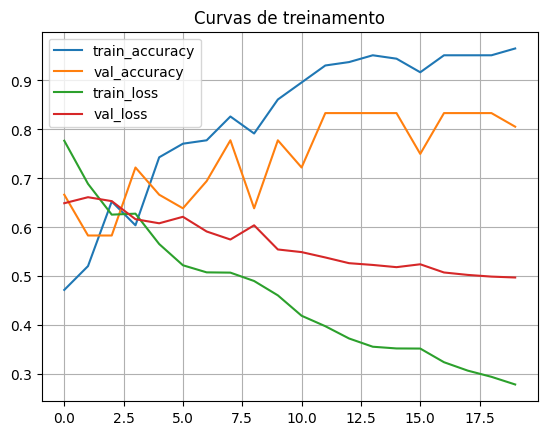

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.grid()
plt.title("Curvas de treinamento")
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 827ms/step
ROC AUC: 0.8611
F1-score: 0.8500


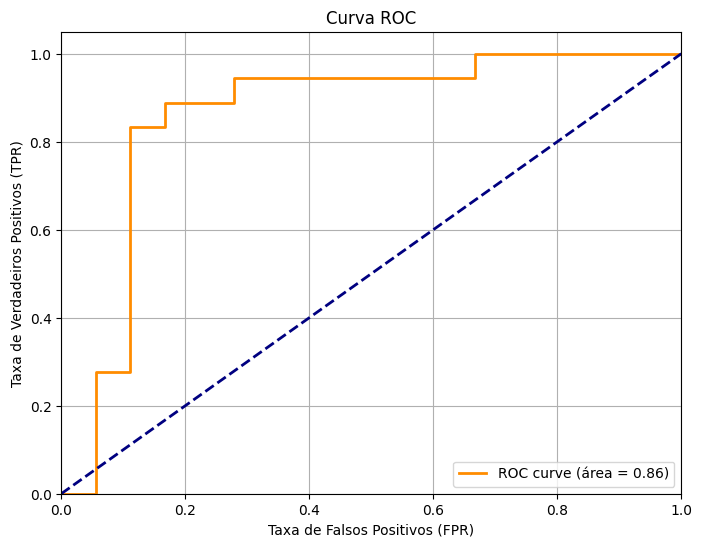

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

# Obtenha os rótulos reais

# Gere as previsões (valores de probabilidade entre 0 e 1)
y_probs = model.predict(val_generator).ravel()

# Converta para classe binária com threshold de 0.5
y_pred = (y_probs > 0.5).astype(int)

# ROC AUC
roc_auc = roc_auc_score(y_true, y_probs)

# F1-score
f1 = f1_score(y_true, y_pred)

print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1-score: {f1:.4f}")

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

# Plotagem
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


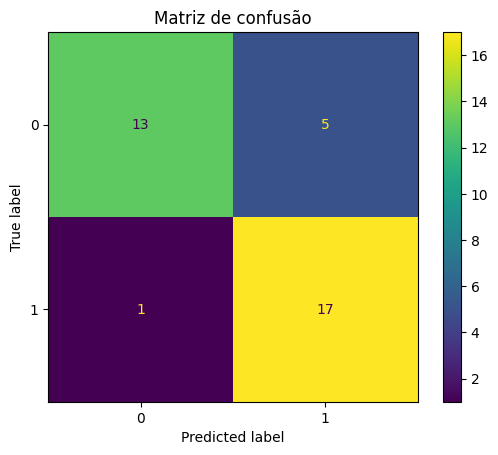

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Previsões no val_generator
y_true = []
y_pred = []
for batch_x, batch_y in val_generator:
    preds = model.predict(batch_x)
    y_true.extend(batch_y)
    y_pred.extend(np.round(preds.flatten()))
    if len(y_true) >= len(val_generator.labels): break

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.title("Matriz de confusão")
plt.grid(False)
plt.show()


In [ ]:
import numpy as np

print("[INFO] Proporção prevista pelo modelo:")
print(f"Classe 1 (damaged): {np.mean(y_pred):.2f}")
print(f"Classe 0 (intact): {1 - np.mean(y_pred):.2f}")


[INFO] Proporção prevista pelo modelo:
Classe 1 (damaged): 0.53
Classe 0 (intact): 0.47


In [ ]:
from collections import Counter
import os

def contar_amostras_interp(base_dir):
    contagem = Counter()
    for class_name in ['damaged', 'intact']:
        for view in ['top', 'side']:
            path = os.path.join(base_dir, class_name, view)
            if os.path.exists(path):
                imagens = [f for f in os.listdir(path) if f.endswith('.png')]
                contagem[f"{class_name}_{view}"] = len(imagens)
    return contagem

contagem = contar_amostras_interp("interpretabilidade")
print("[INFO] Amostras por classe e perspectiva:")
for k, v in contagem.items():
    print(f"{k}: {v}")


[INFO] Amostras por classe e perspectiva:
damaged_top: 10
damaged_side: 10
intact_top: 10
intact_side: 10


In [ ]:
from collections import Counter

labels = []
for class_name in ['intact', 'damaged']:
    for view in ['top', 'side']:
        path = os.path.join("interpretabilidade", class_name, view)
        if os.path.exists(path):
            labels += [class_name] * len([f for f in os.listdir(path) if f.endswith(".png")])

print(Counter(labels))


Counter({'intact': 20, 'damaged': 20})


In [ ]:
import os

base_path = "interpretabilidade"
for root, dirs, files in os.walk(base_path):
    print(f"[DIR] {root}")
    for f in files:
        print(f" └── {f}")


[DIR] interpretabilidade
[DIR] interpretabilidade\damaged
[DIR] interpretabilidade\damaged\side
 └── 0101069901524_side.png
 └── 0101069901524_side.xml
 └── 0105413725474_side.png
 └── 0105413725474_side.xml
 └── 0109451226527_side.png
 └── 0109451226527_side.xml
 └── 0111632059302_side.png
 └── 0111632059302_side.xml
 └── 0118055224146_side.png
 └── 0118055224146_side.xml
 └── 0120928945494_side.png
 └── 0120928945494_side.xml
 └── 0122691608037_side.png
 └── 0122691608037_side.xml
 └── 0123374171704_side.png
 └── 0123374171704_side.xml
 └── 0129768769736_side.png
 └── 0129768769736_side.xml
 └── 0163723873967_side.png
 └── 0163723873967_side.xml
[DIR] interpretabilidade\damaged\top
 └── 0101069901524_top.png
 └── 0101069901524_top.xml
 └── 0105413725474_top.png
 └── 0105413725474_top.xml
 └── 0109451226527_top.png
 └── 0109451226527_top.xml
 └── 0111632059302_top.png
 └── 0111632059302_top.xml
 └── 0118055224146_top.png
 └── 0118055224146_top.xml
 └── 0120928945494_top.png
 └── 01209

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2
import xml.etree.ElementTree as ET


def generate_gradcam(model, top_input_array, side_input_array, layer_name='conv5_block3_out'):
    """
    Gera um heatmap Grad-CAM baseado na imagem lateral (side_input).
    """
    # Extrai a sub-rede ResNet que foi usada com a imagem lateral
    resnet = model.get_layer('resnet50')

    # Cria submodelo apenas para a entrada lateral
    side_input_model = tf.keras.models.Model(inputs=resnet.input,
                                             outputs=[resnet.get_layer(layer_name).output, resnet.output])

    # Constrói um modelo final para Grad-CAM: side -> camada intermediária + saída final do modelo principal
    with tf.GradientTape() as tape:
        inputs = tf.convert_to_tensor(side_input_array, dtype=tf.float32)
        tape.watch(inputs)

        conv_outputs, features = side_input_model(inputs)

        # Pegamos as features intermediárias e passamos pela parte final do modelo
        x = tf.keras.layers.GlobalAveragePooling2D()(features)
        x = tf.keras.layers.Concatenate()([x, x])  # já que estamos duplicando na fusão no modelo original
        x = tf.keras.layers.Dense(128, activation='relu')(x)
        preds = tf.keras.layers.Dense(1, activation='sigmoid')(x)

        loss = preds[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

    return heatmap.numpy()



def heatmap_to_bbox(heatmap, threshold_ratio=0.3):
    heatmap_rescaled = np.uint8(255 * heatmap)
    _, thresh = cv2.threshold(heatmap_rescaled, int(threshold_ratio * 255), 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None
    largest = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest)
    return (x, y, x + w, y + h)


def parse_xml_to_bbox(xml_path):
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        bbox = root.find("object").find("bndbox")
        x_min = int(bbox.find("xmin").text)
        y_min = int(bbox.find("ymin").text)
        x_max = int(bbox.find("xmax").text)
        y_max = int(bbox.find("ymax").text)
        return (x_min, y_min, x_max, y_max)
    except Exception:
        return None


def calculate_iou(box1, box2):
    if box1 is None or box2 is None:
        return 0.0
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    iou = interArea / float(box1Area + box2Area - interArea)
    return iou



In [ ]:
def resize_bbox(bbox, original_size, target_size):
    if bbox is None:
        return None
    x_min, y_min, x_max, y_max = bbox
    orig_w, orig_h = original_size
    target_w, target_h = target_size
    scale_x = target_w / orig_w
    scale_y = target_h / orig_h
    return (
        int(x_min * scale_x),
        int(y_min * scale_y),
        int(x_max * scale_x),
        int(y_max * scale_y),
    )


def evaluate_interpretability(model, image_paths, xml_base_path, input_size=(224, 224)):
    ious = []
    for img_path in image_paths:
        img_name = os.path.basename(img_path)
        serial = img_name.replace(".png", "")
        xml_path = os.path.join(xml_base_path, serial + ".xml")
        if not os.path.exists(xml_path):
            print(f"[{img_name}] XML não encontrado: {xml_path}")
            continue

        # Carrega imagem no tamanho original
        original_img = image.load_img(img_path)
        original_size = original_img.size  # (W, H)

        # Redimensiona para o modelo
        resized_img = original_img.resize(input_size)
        x_side = image.img_to_array(resized_img)
        x_side = np.expand_dims(x_side, axis=0)
        x_side = preprocess_input(x_side)

        x_top = np.zeros_like(x_side)

        # Grad-CAM
        heatmap = generate_gradcam(model, x_top, x_side)
        heatmap = cv2.resize(heatmap, input_size)

        # Bounding boxes
        pred_bbox = heatmap_to_bbox(heatmap)
        true_bbox = parse_xml_to_bbox(xml_path)
        true_bbox = resize_bbox(true_bbox, original_size, input_size)

        iou = calculate_iou(pred_bbox, true_bbox)
        ious.append(iou)

        # Visualização
        plt.figure(figsize=(8, 4))

        # Imagem original
        plt.subplot(1, 3, 1)
        plt.imshow(resized_img)
        plt.title("Imagem")

        # Grad-CAM
        plt.subplot(1, 3, 2)
        plt.imshow(heatmap, cmap='jet')
        plt.title("Grad-CAM")

        # BBoxes
        img_with_bbox = np.array(resized_img).copy()
        if pred_bbox:
            cv2.rectangle(img_with_bbox, pred_bbox[:2], pred_bbox[2:], (255, 0, 0), 2)
        if true_bbox:
            cv2.rectangle(img_with_bbox, true_bbox[:2], true_bbox[2:], (0, 255, 0), 2)

        plt.subplot(1, 3, 3)
        plt.imshow(img_with_bbox.astype(np.uint8))
        plt.title(f"IoU = {iou:.2f}")
        plt.tight_layout()
        plt.show()

    return ious

def evaluate_multiinput_interpretability(model, image_paths, xml_base_path, input_size=(224, 224)):
    ious_top = []
    ious_side = []
    ious_best = []

    for img_path in image_paths:
        img_name = os.path.basename(img_path)
        serial = img_name.replace(".png", "")
        xml_path = os.path.join(xml_base_path, serial + ".xml")
        if not os.path.exists(xml_path):
            print(f"[{img_name}] XML não encontrado: {xml_path}")
            continue

        # Carrega imagem original e redimensiona
        original_img = image.load_img(img_path)
        original_size = original_img.size  # (width, height)
        resized_img = original_img.resize(input_size)

        x_img = image.img_to_array(resized_img)
        x_img = np.expand_dims(x_img, axis=0)
        x_img = preprocess_input(x_img)

        # Grad-CAM da imagem lateral
        heatmap_side = generate_gradcam(model, np.zeros_like(x_img), x_img)
        heatmap_side = cv2.resize(heatmap_side, input_size)
        pred_bbox_side = heatmap_to_bbox(heatmap_side)

        # Grad-CAM da imagem superior
        heatmap_top = generate_gradcam(model, x_img, np.zeros_like(x_img))
        heatmap_top = cv2.resize(heatmap_top, input_size)
        pred_bbox_top = heatmap_to_bbox(heatmap_top)

        # Ground truth do XML
        true_bbox = parse_xml_to_bbox(xml_path)
        true_bbox = resize_bbox(true_bbox, original_size, input_size)

        # Cálculo de IoUs
        iou_side = calculate_iou(pred_bbox_side, true_bbox)
        iou_top = calculate_iou(pred_bbox_top, true_bbox)
        iou_best = max(iou_side, iou_top)

        ious_side.append(iou_side)
        ious_top.append(iou_top)
        ious_best.append(iou_best)

        # Visualização dos heatmaps
        plt.figure(figsize=(12, 4))

        # Input lateral
        plt.subplot(1, 4, 1)
        plt.imshow(resized_img)
        plt.title("Imagem")

        # Heatmap lateral
        plt.subplot(1, 4, 2)
        plt.imshow(heatmap_side, cmap='jet')
        plt.title(f"Grad-CAM Side\nIoU = {iou_side:.2f}")

        # Heatmap superior
        plt.subplot(1, 4, 3)
        plt.imshow(heatmap_top, cmap='jet')
        plt.title(f"Grad-CAM Top\nIoU = {iou_top:.2f}")

        # BBoxes combinadas
        img_with_bbox = np.array(resized_img).copy()
        if pred_bbox_side:
            cv2.rectangle(img_with_bbox, pred_bbox_side[:2], pred_bbox_side[2:], (255, 0, 0), 2)  # RED
        if pred_bbox_top:
            cv2.rectangle(img_with_bbox, pred_bbox_top[:2], pred_bbox_top[2:], (0, 0, 255), 2)    # BLUE
        if true_bbox:
            cv2.rectangle(img_with_bbox, true_bbox[:2], true_bbox[2:], (0, 255, 0), 2)            # GREEN

        plt.subplot(1, 4, 4)
        plt.imshow(img_with_bbox.astype(np.uint8))
        plt.title(f"Best IoU = {iou_best:.2f}")
        plt.tight_layout()
        plt.show()

    # Retorno
    print("=== Estatísticas ===")
    print(f"IoU médio - Side: {np.mean(ious_side):.4f}")
    print(f"IoU médio - Top : {np.mean(ious_top):.4f}")
    print(f"IoU médio - Best: {np.mean(ious_best):.4f}")
    print(f"IoU > 0.5 - Best : {np.sum(np.array(ious_best) > 0.5)} / {len(ious_best)}")

    return ious_side, ious_top, ious_best



In [ ]:
def generate_gradcam(model, top_input_array, side_input_array, layer_name='conv5_block3_out'):
    """
    Gera um heatmap Grad-CAM para `side_input` ou `top_input` dependendo de qual for diferente de zero.
    """
    # Detecta se a entrada ativa é a lateral ou a superior
    if np.sum(side_input_array) > 0:
        mode = 'side'
        input_array = side_input_array
    else:
        mode = 'top'
        input_array = top_input_array

    # Extrai a sub-rede ResNet usada
    resnet = model.get_layer('resnet50')

    # Modelo com saída na camada de ativação intermediária e final da ResNet
    feature_model = Model(inputs=resnet.input,
                          outputs=[resnet.get_layer(layer_name).output, resnet.output])

    with tf.GradientTape() as tape:
        inputs = tf.convert_to_tensor(input_array, dtype=tf.float32)
        tape.watch(inputs)

        conv_outputs, features = feature_model(inputs)

        # Passagem pela head do modelo
        x = tf.keras.layers.GlobalAveragePooling2D()(features)

        # Simula a fusão com a outra entrada (zerada)
        if mode == 'side':
            x_concat = tf.keras.layers.Concatenate()([tf.zeros_like(x), x])
        else:  # top
            x_concat = tf.keras.layers.Concatenate()([x, tf.zeros_like(x)])

        x = tf.keras.layers.Dense(128, activation='relu')(x_concat)
        preds = tf.keras.layers.Dense(1, activation='sigmoid')(x)

        loss = preds[:, 0]

    # Grad-CAM propriamente dito
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-6)

    return heatmap.numpy()


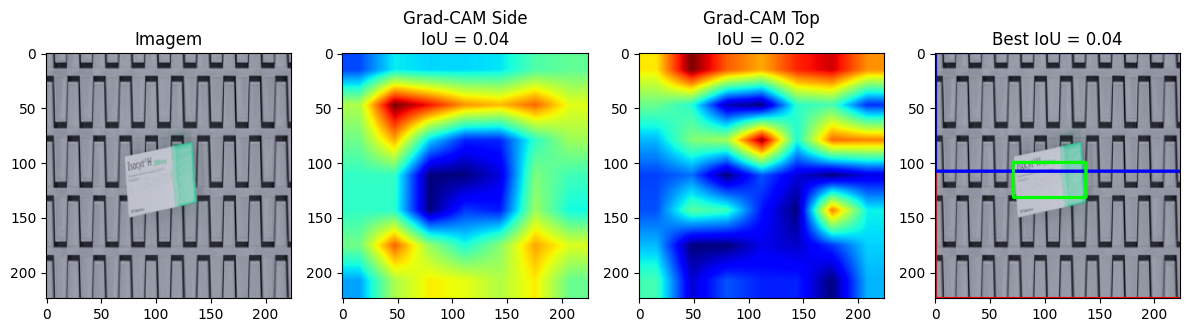

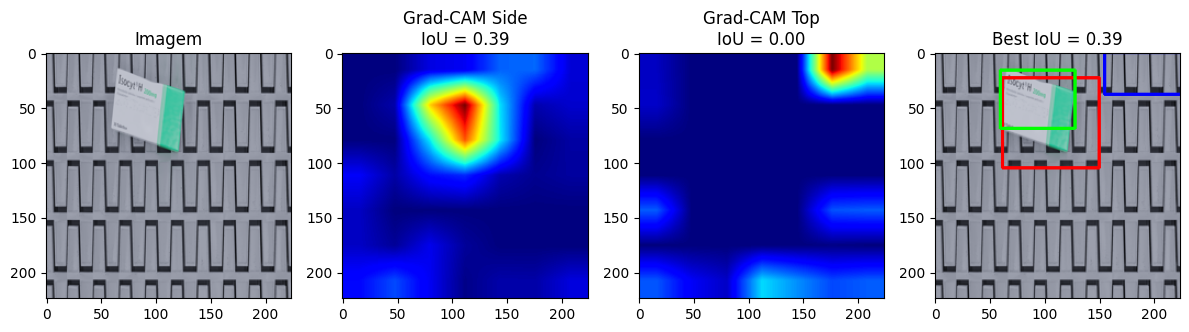

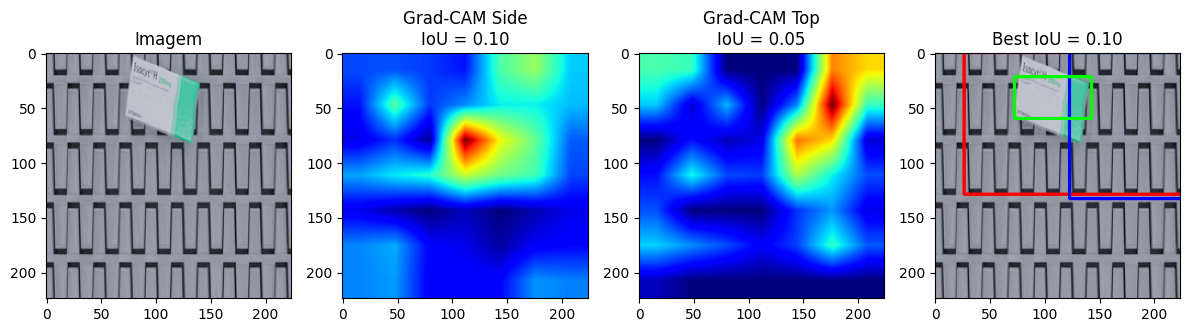

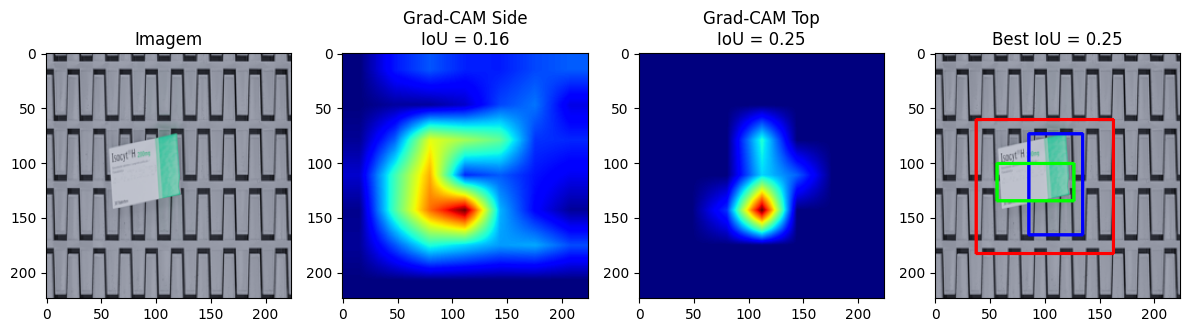

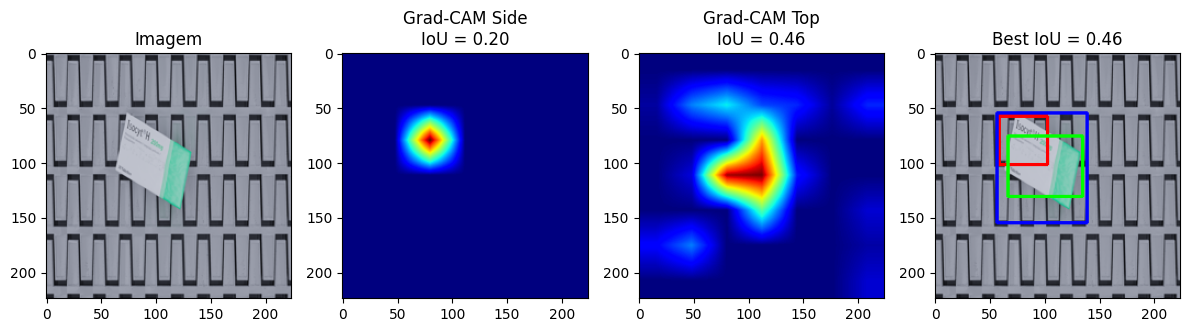

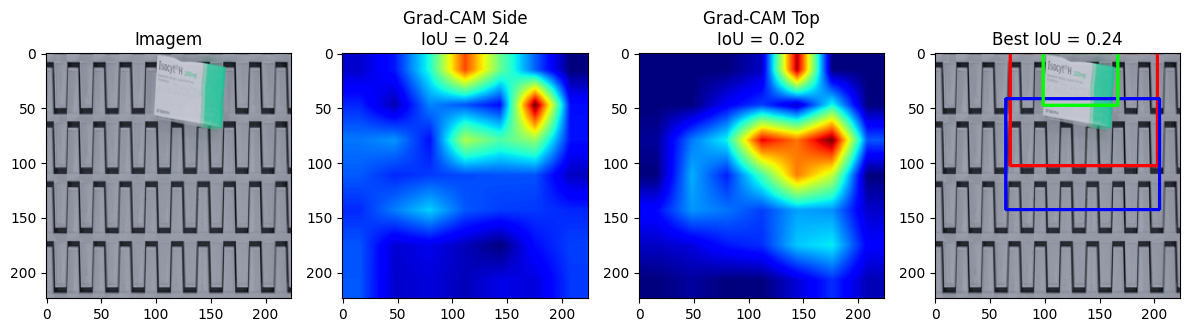

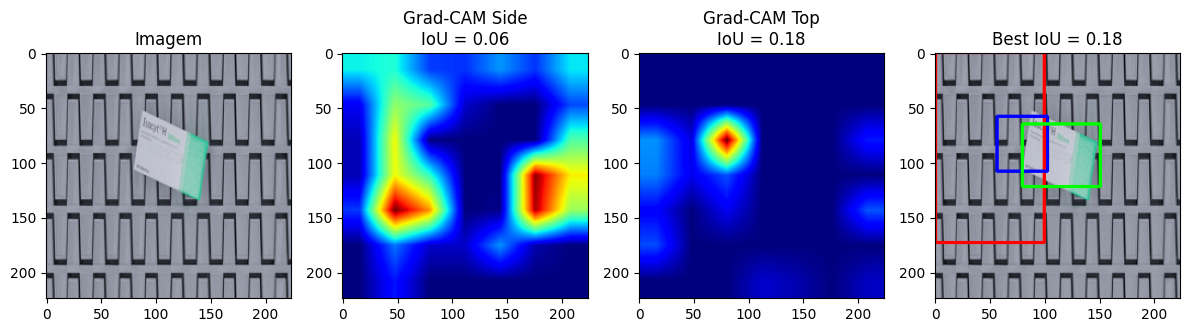

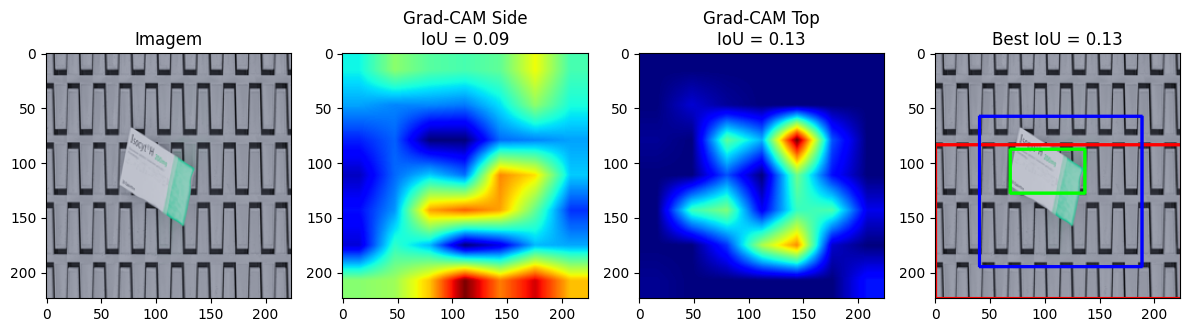

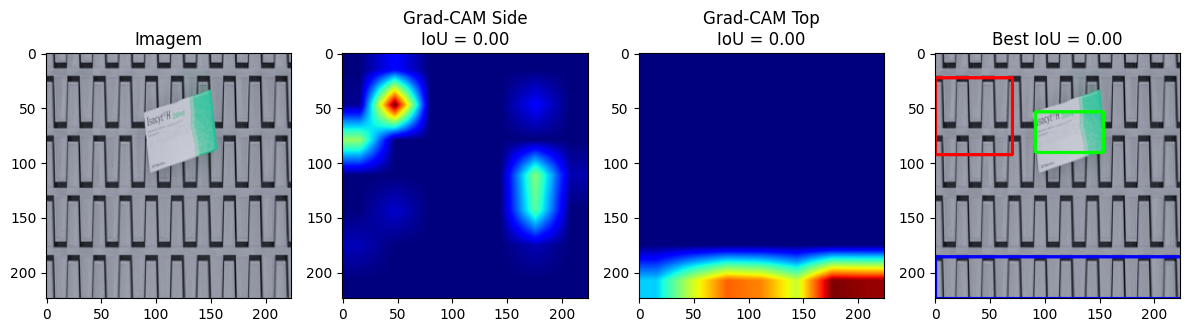

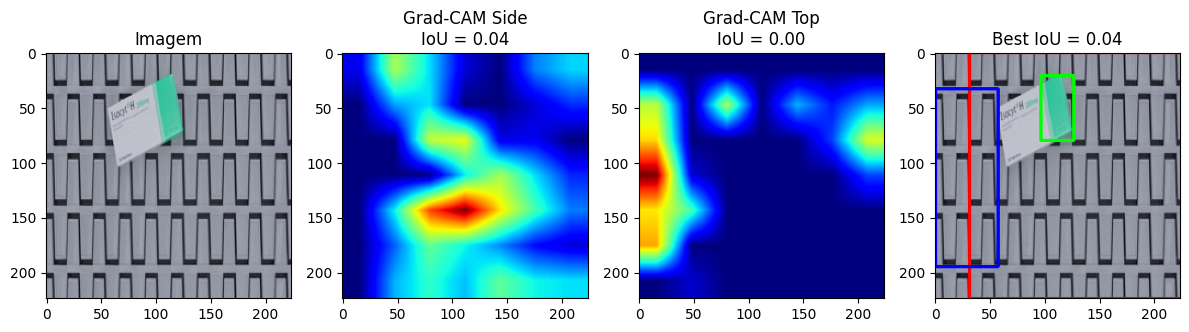

=== Estatísticas ===
IoU médio - Side: 0.1311
IoU médio - Top : 0.1122
IoU médio - Best: 0.1842
IoU > 0.5 - Best : 0 / 10


In [ ]:
# Caminhos
image_paths = sorted(glob.glob("interpretabilidade/damaged/top/*.png"))
xml_base_path = "interpretabilidade/damaged/top/"

# Avaliação multiinput completa
ious_side, ious_top, ious_best = evaluate_multiinput_interpretability(model, image_paths, xml_base_path)


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import os

def evaluate_multiinput_gradcam(model, image_paths, xml_base_path, input_size=(224, 224), layer_name='conv5_block3_out'):
    import matplotlib.pyplot as plt
    import xml.etree.ElementTree as ET

    def parse_xml_to_bbox(xml_path):
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
            bbox = root.find("object").find("bndbox")
            x_min = int(bbox.find("xmin").text)
            y_min = int(bbox.find("ymin").text)
            x_max = int(bbox.find("xmax").text)
            y_max = int(bbox.find("ymax").text)
            return (x_min, y_min, x_max, y_max)
        except Exception:
            return None

    def heatmap_to_bbox(heatmap, threshold_ratio=0.3):
        heatmap_rescaled = np.uint8(255 * heatmap)
        heatmap_resized = cv2.resize(heatmap_rescaled, input_size)
        _, thresh = cv2.threshold(heatmap_resized, int(threshold_ratio * 255), 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            return None
        largest = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest)
        return (x, y, x + w, y + h)

    def calculate_iou(box1, box2):
        if box1 is None or box2 is None:
            return 0.0
        xA = max(box1[0], box2[0])
        yA = max(box1[1], box2[1])
        xB = min(box1[2], box2[2])
        yB = min(box1[3], box2[3])
        interArea = max(0, xB - xA) * max(0, yB - yA)
        box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
        box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])
        return interArea / float(box1Area + box2Area - interArea + 1e-8)

    def generate_gradcam(model, top_input_array, side_input_array, layer_name='conv5_block3_out'):
        # Detect which input is active
        if np.sum(side_input_array) > 0:
            mode = 'side'
            input_array = side_input_array
        else:
            mode = 'top'
            input_array = top_input_array

        resnet = model.get_layer('resnet50')
        feature_model = tf.keras.models.Model(inputs=resnet.input,
                                              outputs=[resnet.get_layer(layer_name).output, resnet.output])

        with tf.GradientTape() as tape:
            inputs = tf.convert_to_tensor(input_array, dtype=tf.float32)
            tape.watch(inputs)
            conv_outputs, features = feature_model(inputs)
            x = tf.keras.layers.GlobalAveragePooling2D()(features)
            if mode == 'side':
                x_concat = tf.keras.layers.Concatenate()([tf.zeros_like(x), x])
            else:
                x_concat = tf.keras.layers.Concatenate()([x, tf.zeros_like(x)])
            x = tf.keras.layers.Dense(128, activation='relu')(x_concat)
            preds = tf.keras.layers.Dense(1, activation='sigmoid')(x)
            loss = preds[:, 0]

        grads = tape.gradient(loss, conv_outputs)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_outputs = conv_outputs[0]
        heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
        heatmap = tf.squeeze(heatmap)
        heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-8)
        return heatmap.numpy()

    ious_side = []
    ious_top = []
    ious_best = []

    for img_path in image_paths:
        img_name = os.path.basename(img_path)
        serial = img_name.replace(".png", "")
        xml_path = os.path.join(xml_base_path, serial + ".xml")
        if not os.path.exists(xml_path):
            print(f"[{img_name}] XML não encontrado: {xml_path}")
            continue

        # Load and preprocess image
        img = image.load_img(img_path, target_size=input_size)
        x_img = image.img_to_array(img)
        x_img = np.expand_dims(x_img, axis=0)
        x_img = preprocess_input(x_img)

        # Grad-CAM for side input
        x_top_zeros = np.zeros_like(x_img)
        heatmap_side = generate_gradcam(model, x_top_zeros, x_img, layer_name)
        heatmap_side = cv2.resize(heatmap_side, input_size)
        pred_bbox_side = heatmap_to_bbox(heatmap_side)

        # Grad-CAM for top input
        x_side_zeros = np.zeros_like(x_img)
        heatmap_top = generate_gradcam(model, x_img, x_side_zeros, layer_name)
        heatmap_top = cv2.resize(heatmap_top, input_size)
        pred_bbox_top = heatmap_to_bbox(heatmap_top)

        # Ground truth bbox
        true_bbox = parse_xml_to_bbox(xml_path)

        # IoUs
        iou_side = calculate_iou(pred_bbox_side, true_bbox)
        iou_top = calculate_iou(pred_bbox_top, true_bbox)
        iou_best = max(iou_side, iou_top)

        ious_side.append(iou_side)
        ious_top.append(iou_top)
        ious_best.append(iou_best)

        # Visualization
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 4, 1)
        plt.imshow(img)
        plt.title("Imagem")

        plt.subplot(1, 4, 2)
        plt.imshow(heatmap_side, cmap='jet')
        plt.title(f"Grad-CAM Side\nIoU = {iou_side:.2f}")

        plt.subplot(1, 4, 3)
        plt.imshow(heatmap_top, cmap='jet')
        plt.title(f"Grad-CAM Top\nIoU = {iou_top:.2f}")

        img_with_bbox = np.array(img).copy()
        if pred_bbox_side:
            cv2.rectangle(img_with_bbox, pred_bbox_side[:2], pred_bbox_side[2:], (255, 0, 0), 2)
        if pred_bbox_top:
            cv2.rectangle(img_with_bbox, pred_bbox_top[:2], pred_bbox_top[2:], (0, 0, 255), 2)
        if true_bbox:
            cv2.rectangle(img_with_bbox, true_bbox[:2], true_bbox[2:], (0, 255, 0), 2)
        plt.subplot(1, 4, 4)
        plt.imshow(img_with_bbox.astype(np.uint8))
        plt.title(f"Best IoU = {iou_best:.2f}")
        plt.tight_layout()
        plt.show()

    print("=== Estatísticas ===")
    print(f"IoU médio - Side: {np.mean(ious_side):.4f}")
    print(f"IoU médio - Top : {np.mean(ious_top):.4f}")
    print(f"IoU médio - Best: {np.mean(ious_best):.4f}")
    print(f"IoU > 0.5 - Best : {np.sum(np.array(ious_best) > 0.5)} / {len(ious_best)}")

    return ious_side, ious_top, ious_best

# Exemplo de uso:
# ious_side, ious_top, ious_best = evaluate_multiinput_gradcam(model, image_paths, xml_base_path)

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

def parse_xml_to_bbox(xml_path):
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        bbox = root.find("object").find("bndbox")
        x_min = int(bbox.find("xmin").text)
        y_min = int(bbox.find("ymin").text)
        x_max = int(bbox.find("xmax").text)
        y_max = int(bbox.find("ymax").text)
        return (x_min, y_min, x_max, y_max)
    except Exception:
        return None

def resize_bbox(bbox, original_size, target_size=(224, 224)):
    if bbox is None:
        return None
    x_min, y_min, x_max, y_max = bbox
    orig_w, orig_h = original_size
    target_w, target_h = target_size
    scale_x = target_w / orig_w
    scale_y = target_h / orig_h
    return (
        int(x_min * scale_x),
        int(y_min * scale_y),
        int(x_max * scale_x),
        int(y_max * scale_y),
    )

def heatmap_to_bbox(heatmap, threshold_ratio=0.3, input_size=(224, 224)):
    heatmap_rescaled = np.uint8(255 * heatmap)
    heatmap_resized = cv2.resize(heatmap_rescaled, input_size)
    _, thresh = cv2.threshold(heatmap_resized, int(threshold_ratio * 255), 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None
    largest = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest)
    return (x, y, x + w, y + h)

def calculate_iou(box1, box2):
    if box1 is None or box2 is None:
        return 0.0
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return interArea / float(box1Area + box2Area - interArea + 1e-8)

def generate_gradcam(model, top_input_array, side_input_array, layer_name='conv5_block3_out'):
    if np.sum(side_input_array) > 0:
        mode = 'side'
        input_array = side_input_array
    else:
        mode = 'top'
        input_array = top_input_array

    resnet = model.get_layer('resnet50')
    feature_model = tf.keras.models.Model(
        inputs=resnet.input,
        outputs=[resnet.get_layer(layer_name).output, resnet.output]
    )

    with tf.GradientTape() as tape:
        inputs = tf.convert_to_tensor(input_array, dtype=tf.float32)
        tape.watch(inputs)
        conv_outputs, features = feature_model(inputs)
        x = tf.keras.layers.GlobalAveragePooling2D()(features)
        if mode == 'side':
            x_concat = tf.keras.layers.Concatenate()([tf.zeros_like(x), x])
        else:
            x_concat = tf.keras.layers.Concatenate()([x, tf.zeros_like(x)])
        x = tf.keras.layers.Dense(128, activation='relu')(x_concat)
        preds = tf.keras.layers.Dense(1, activation='sigmoid')(x)
        loss = preds[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-8)
    return heatmap.numpy()

def evaluate_gradcam_with_real_inputs(model, top_dir, side_dir, xml_dir, input_size=(224, 224)):
    ious_top = []
    ious_side = []
    ious_best = []

    filenames = sorted([f.replace("_top.png", "") for f in os.listdir(top_dir) if f.endswith("_top.png")])

    for filename in filenames:
        top_path  = os.path.join(top_dir, f"{filename}_top.png")
        side_path = os.path.join(side_dir, f"{filename}_side.png")
        xml_path  = os.path.join(xml_dir,  f"{filename}_side.xml")

        if not (os.path.exists(top_path) and os.path.exists(side_path) and os.path.exists(xml_path)):
            print(f"[{filename}] Arquivos ausentes.")
            continue

        img_top = image.load_img(top_path, target_size=input_size)
        img_side = image.load_img(side_path, target_size=input_size)

        arr_top = preprocess_input(np.expand_dims(image.img_to_array(img_top), axis=0))
        arr_side = preprocess_input(np.expand_dims(image.img_to_array(img_side), axis=0))

        # Correção das chamadas para gerar Grad-CAM
        heatmap_top = generate_gradcam(model, arr_top, np.zeros_like(arr_top))
        heatmap_side = generate_gradcam(model, np.zeros_like(arr_side), arr_side)

        bbox_top = heatmap_to_bbox(heatmap_top, input_size=input_size)
        bbox_side = heatmap_to_bbox(heatmap_side, input_size=input_size)

        true_bbox = parse_xml_to_bbox(xml_path)
        original_size = image.load_img(side_path).size  # (width, height)
        true_bbox = resize_bbox(true_bbox, original_size, input_size)

        iou_top = calculate_iou(bbox_top, true_bbox)
        iou_side = calculate_iou(bbox_side, true_bbox)
        iou_best = max(iou_top, iou_side)

        ious_top.append(iou_top)
        ious_side.append(iou_side)
        ious_best.append(iou_best)

        plt.figure(figsize=(14, 4))

        # Grad-CAM da imagem top
        plt.subplot(1, 4, 1)
        plt.imshow(img_top)
        plt.title("Imagem Top")

        plt.subplot(1, 4, 2)
        plt.imshow(heatmap_top, cmap='jet')
        plt.title(f"Grad-CAM Top\nIoU = {iou_top:.2f}")

        # Grad-CAM da imagem side
        plt.subplot(1, 4, 3)
        plt.imshow(img_side)
        plt.title("Imagem Side")

        plt.subplot(1, 4, 4)
        img_side_with_boxes = np.array(img_side).copy()

        if bbox_side:
            cv2.rectangle(img_side_with_boxes, bbox_side[:2], bbox_side[2:], (255, 0, 0), 2)
        if true_bbox:
            cv2.rectangle(img_side_with_boxes, true_bbox[:2], true_bbox[2:], (0, 255, 0), 2)
        plt.imshow(img_side_with_boxes.astype(np.uint8))
        plt.title(f"Grad-CAM Side vs Ground\nIoU = {iou_side:.2f}")
        plt.tight_layout()
        plt.show()

    print("=== Estatísticas ===")
    print(f"IoU médio - Top : {np.mean(ious_top):.4f}")
    print(f"IoU médio - Side: {np.mean(ious_side):.4f}")
    print(f"IoU médio - Best: {np.mean(ious_best):.4f}")
    print(f"IoU > 0.5 - Best : {np.sum(np.array(ious_best) > 0.5)} / {len(ious_best)}")

    return ious_top, ious_side, ious_best


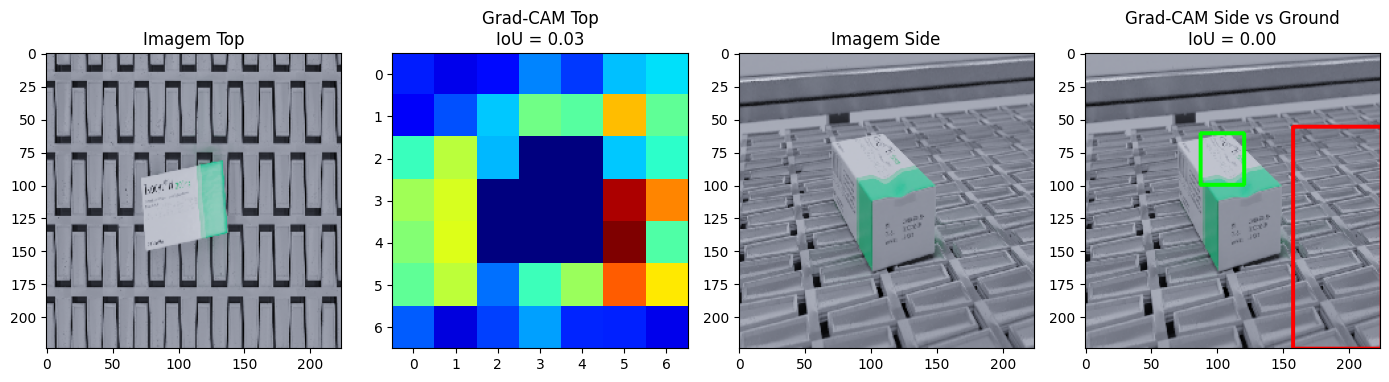

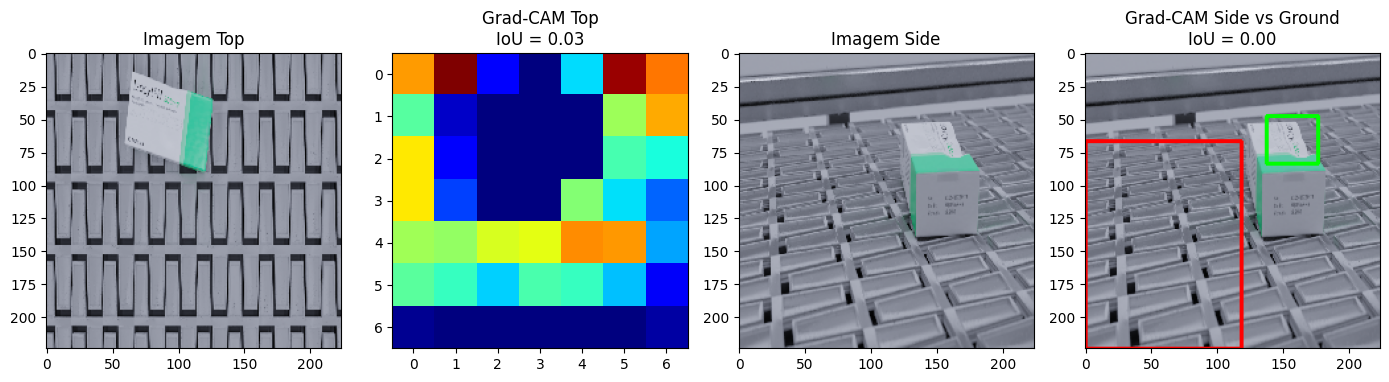

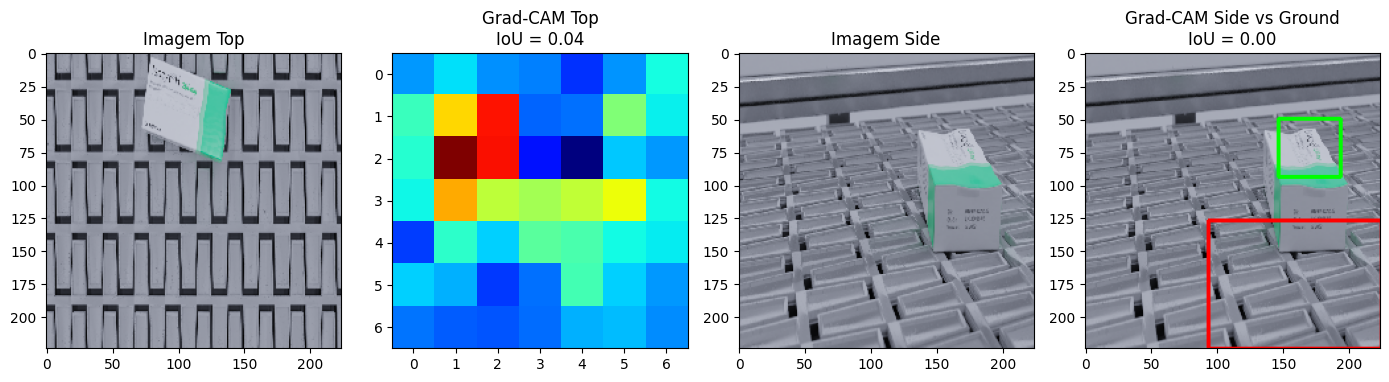

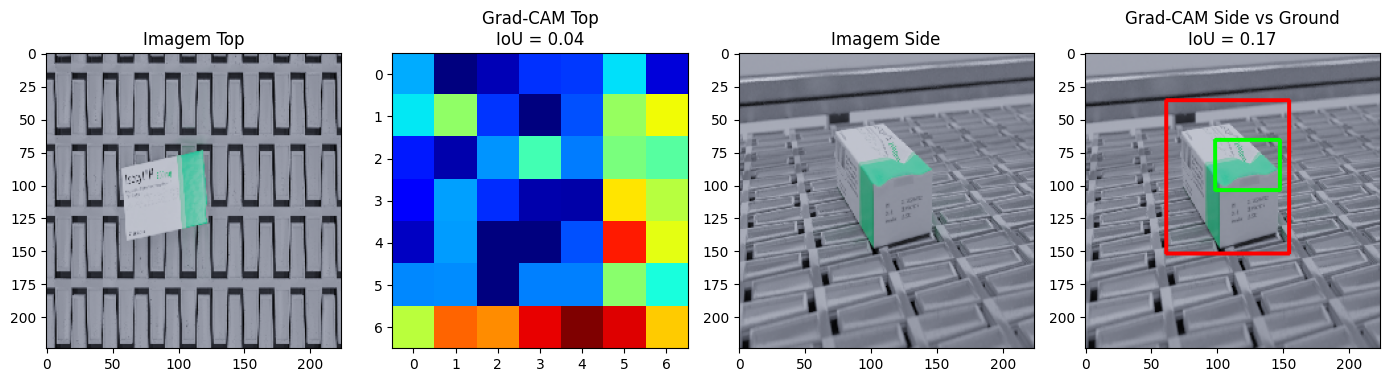

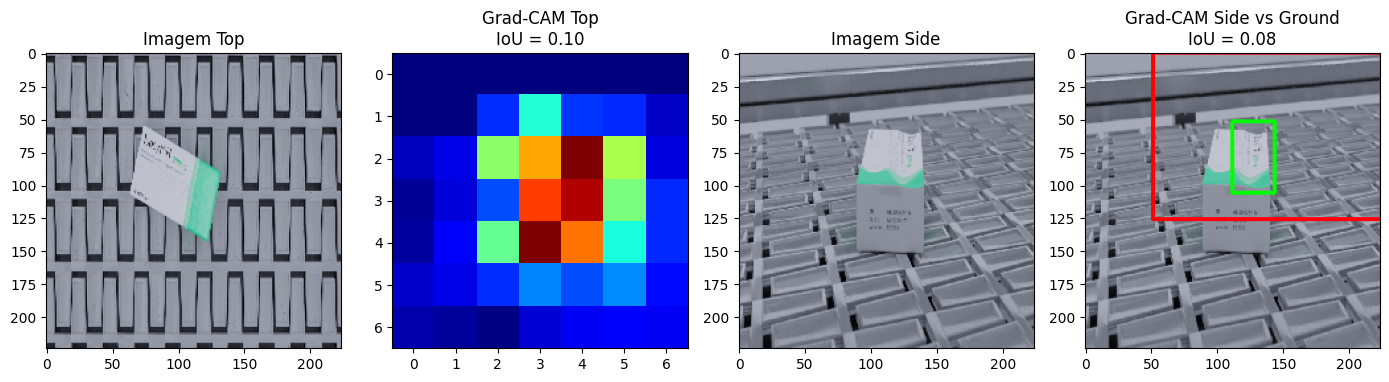

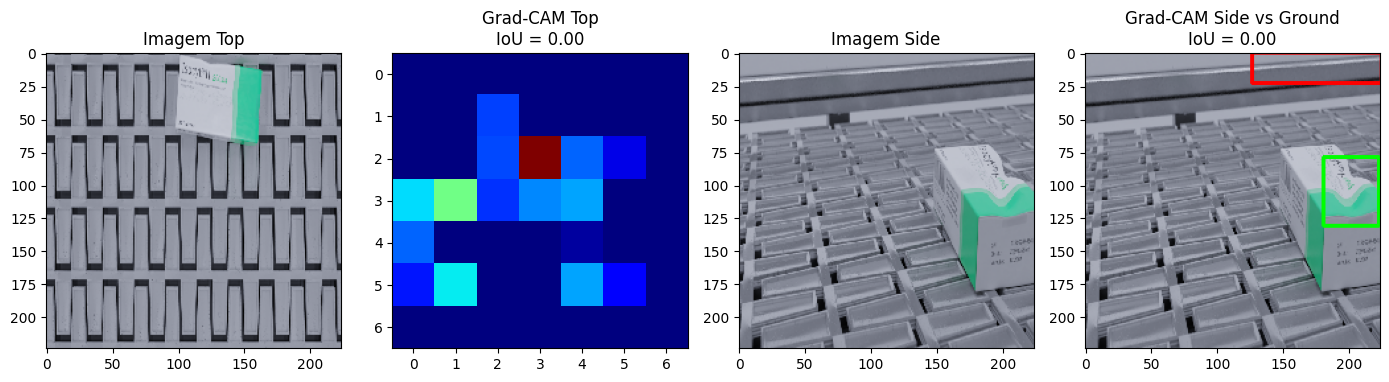

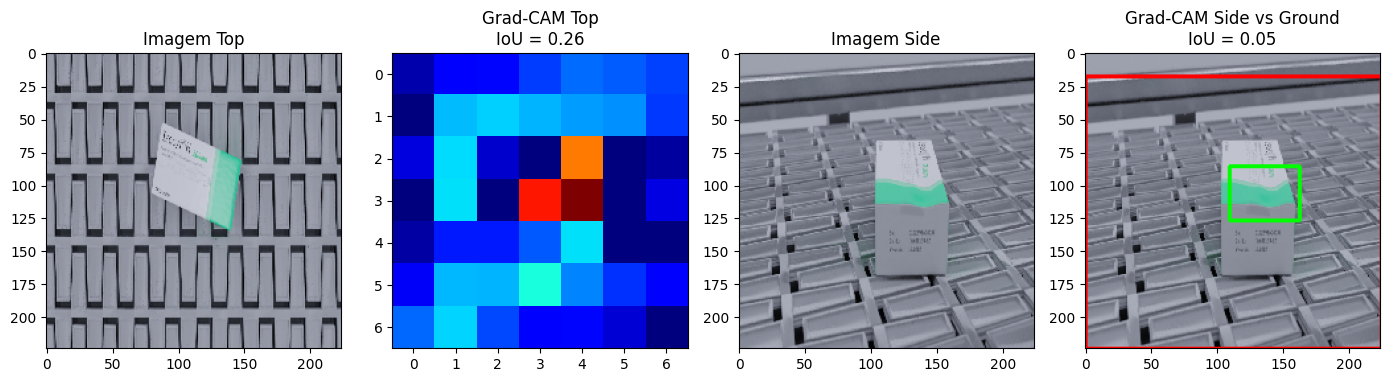

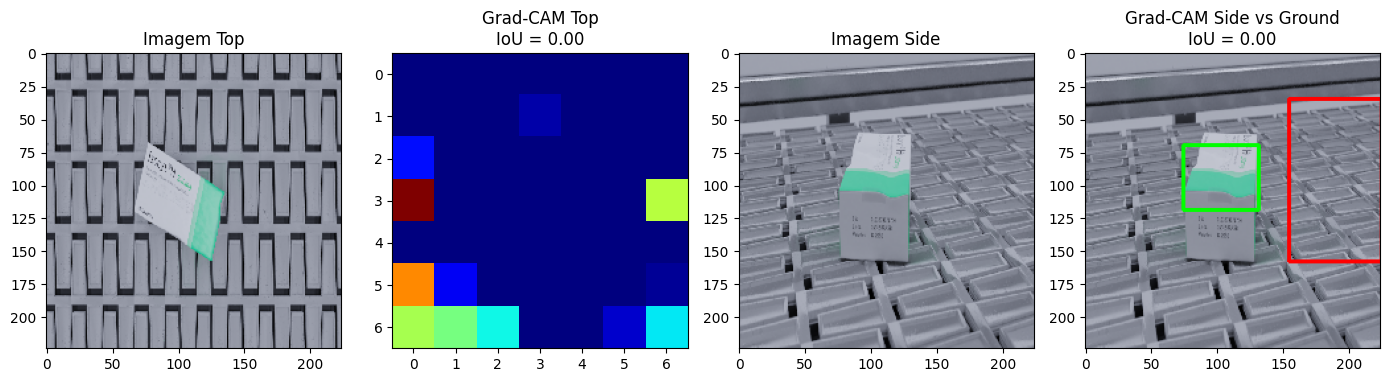

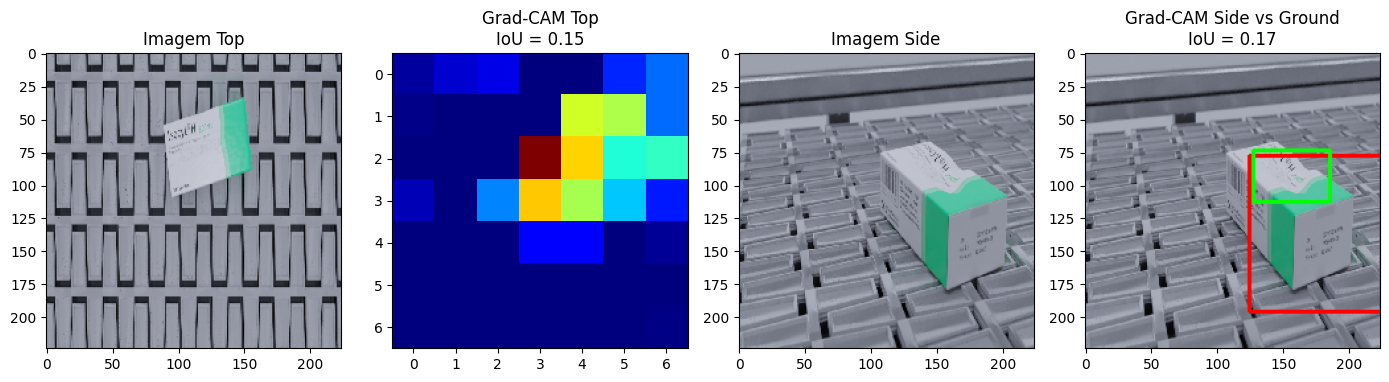

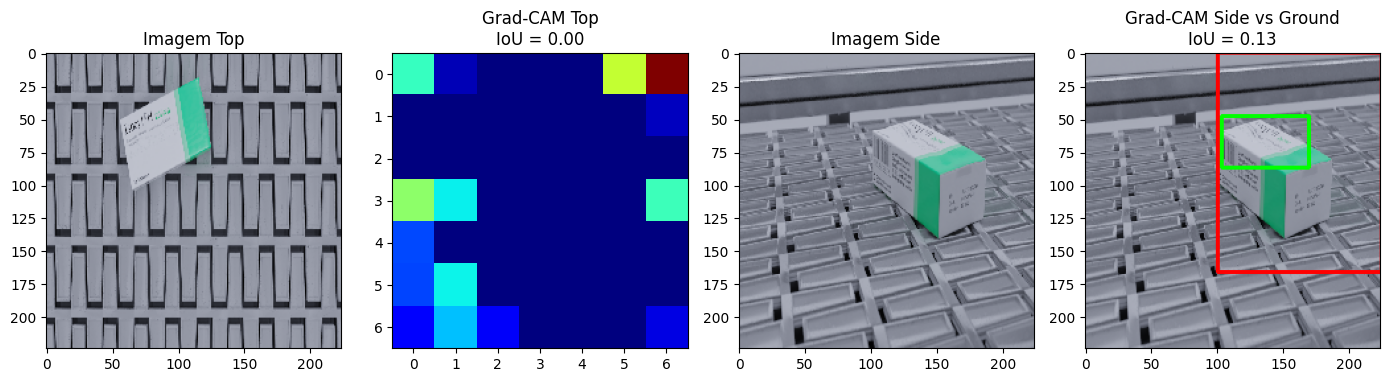

=== Estatísticas ===
IoU médio - Top : 0.0651
IoU médio - Side: 0.0593
IoU médio - Best: 0.0930
IoU > 0.5 - Best : 0 / 10


In [ ]:
top_dir = "interpretabilidade/damaged/top"
side_dir = "interpretabilidade/damaged/side"

ious_top, ious_side, ious_best = evaluate_gradcam_with_real_inputs(
    model,
    top_dir="interpretabilidade/damaged/top",
    side_dir="interpretabilidade/damaged/side",
    xml_dir="interpretabilidade/damaged/side"
)


## Heatmap Diagnosis (Grad-CAM)

**Focus inconsistent with the actual damage area:**

- In some images, the focus is on background areas or the floor (such as grids or reflected lights).
- In others, the activation touches the box but not the critical damage region.

**Grad-CAM bounding box shape misaligned:**

- The activation shape is irregular, often diffuse. This makes it difficult to generate a coherent bounding box via thresholding.

**Mismatch between what the model learns and what we want to interpret:**

- The model may be getting the classification right based on irrelevant patterns (e.g., light position, shadow, background texture).

#### Possible Causes

| Cause | Explanation |
|-------|-------------|
| Model was not trained with spatial focus (attention to damage location) | The model was trained only to classify, not to localize the defect. It has no explicit incentive to focus on the damaged area. |
| Grad-CAM layer is shallow or irrelevant | It may be using a feature map with no correlation to the damage. |
| ResNet architecture or weights are underutilized | Since your network is multi-input, it may be prioritizing the top input or poorly combining the information. |

# CNN

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CONFIGURAÇÕES
img_size = (224, 224)
batch_size = 16
base_dir = "data_top"  # sua estrutura: data_top/intact, data_top/damaged

# DATA AUGMENTATION E LOADERS
datagen = ImageDataGenerator(
    preprocessing_function=None,  # insira preprocess_input se for usar modelos pretreinados
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# ARQUITETURA CNN FUNCIONAL
def build_cnn_model(input_shape=(224, 224, 3)):
    inputs = Input(shape=input_shape, name="input_image")

    x = Conv2D(32, (3, 3), activation='relu', name="conv2d_1")(inputs)
    x = BatchNormalization(name="bn_1")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="pool_1")(x)

    x = Conv2D(64, (3, 3), activation='relu', name="conv2d_2")(x)
    x = BatchNormalization(name="bn_2")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="pool_2")(x)

    x = Conv2D(128, (3, 3), activation='relu', name="conv2d_3")(x)
    x = BatchNormalization(name="bn_3")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="pool_3")(x)

    x = Flatten(name="flatten")(x)
    x = Dense(128, activation='relu', name="dense_1")(x)
    x = Dropout(0.5, name="dropout")(x)
    outputs = Dense(1, activation='sigmoid', name="output")(x)

    model = Model(inputs=inputs, outputs=outputs, name="cnn_functional")
    return model

# CRIAÇÃO, COMPILAÇÃO E TREINO
model = build_cnn_model()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen
)


Found 144 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


c:\Users\joaoa\Image-Classification-in-Production-line\Image-Classification-in-Production-line\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 732ms/step - accuracy: 0.4851 - loss: 4.0340 - val_accuracy: 0.5278 - val_loss: 2.0609
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 743ms/step - accuracy: 0.5479 - loss: 3.3150 - val_accuracy: 0.5278 - val_loss: 1.3050
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6140 - loss: 2.0994 - val_accuracy: 0.5000 - val_loss: 1.9520
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 762ms/step - accuracy: 0.5980 - loss: 1.4747 - val_accuracy: 0.3889 - val_loss: 0.7925
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 602ms/step - accuracy: 0.6920 - loss: 0.6831 - val_accuracy: 0.5000 - val_loss: 0.7608
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 614ms/step - accuracy: 0.7029 - loss: 0.5850 - val_accuracy: 0.4444 - val_loss: 0.7224
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.7097 - loss: 0.5466 - val_accuracy: 0.5000 - val_loss: 0.6974
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 616ms/step - accuracy: 0.7807 - loss: 0.4760 - val_accuracy: 0.5278 - val_loss: 0

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CONFIGURAÇÕES
img_size = (224, 224)
batch_size = 8
base_dir = "data_top"

# DATA AUGMENTATION
datagen = ImageDataGenerator(

    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# ARQUITETURA MAIS PROFUNDA
def build_deeper_cnn(input_shape=(224, 224, 3)):
    inputs = Input(shape=input_shape, name="input_image")

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs, name="deeper_cnn")
    return model

# CRIAÇÃO E TREINO DO MODELO
model = build_deeper_cnn()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[checkpoint]
)


Found 144 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.6103 - loss: 3.8108
Epoch 1: val_accuracy did not improve from 0.63889
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 712ms/step - accuracy: 0.6070 - loss: 3.9382 - val_accuracy: 0.5000 - val_loss: 1.1859
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.5201 - loss: 7.5417
Epoch 2: val_accuracy did not improve from 0.63889
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 801ms/step - accuracy: 0.5175 - loss: 7.5051 - val_accuracy: 0.4167 - val_loss: 0.7278
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.5084 - loss: 6.3796
Epoch 3: val_accuracy did not improve from 0.63889
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 756ms/step - accuracy: 0.5116 - loss: 6.3471 - val_accuracy: 0.5000 - val_loss: 0.7956
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.4969 - loss: 5.1536
Epoch 4: val_accuracy did not improve from 0.63889
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 819ms/step - accuracy: 0.4974 - loss: 5.1307 - val_accuracy: 0.5000

In [ ]:
for layer in model.layers:
    print(layer.name)


input_image
conv2d_1
bn_1
pool_1
conv2d_2
bn_2
pool_2
conv2d_3
bn_3
pool_3
flatten
dense_1
dropout
output


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
0101069901524_top - Pred: 0.336
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
0105413725474_top - Pred: 0.333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
0109451226527_top - Pred: 0.335
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0111632059302_top - Pred: 0.333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
0118055224146_top - Pred: 0.336
[RESULTADO FINAL] Média IoU: nan - Acima de 0.5: 0 / 0


c:\Users\joaoa\Image-Classification-in-Production-line\Image-Classification-in-Production-line\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\joaoa\Image-Classification-in-Production-line\Image-Classification-in-Production-line\.venv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


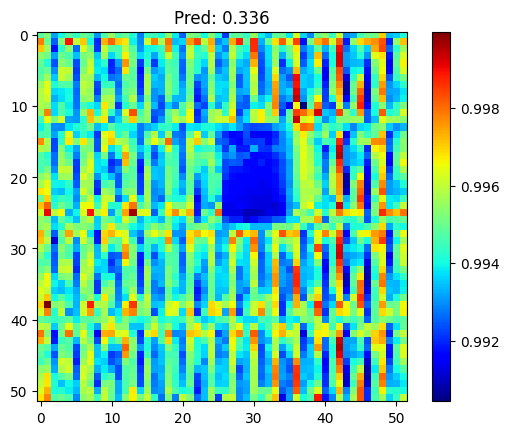

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import xml.etree.ElementTree as ET
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import glob

def extract_gt_bbox(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    bbox = root.find(".//bndbox")
    if bbox is not None:
        return tuple(map(int, [bbox.find("xmin").text, bbox.find("ymin").text,
                               bbox.find("xmax").text, bbox.find("ymax").text]))
    return None

def compute_iou(boxA, boxB):
    xA, yA = max(boxA[0], boxB[0]), max(boxA[1], boxB[1])
    xB, yB = min(boxA[2], boxB[2]), min(boxA[3], boxB[3])
    inter = max(0, xB - xA) * max(0, yB - yA)
    areaA = (boxA[2]-boxA[0]) * (boxA[3]-boxA[1])
    areaB = (boxB[2]-boxB[0]) * (boxB[3]-boxB[1])
    return inter / float(areaA + areaB - inter)

def make_gradcam_heatmap(model, img_array, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)[0]
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

def heatmap_to_bbox(heatmap, threshold=0.3):
    heatmap = cv2.resize(heatmap, (224, 224))
    _, thresh = cv2.threshold((heatmap * 255).astype(np.uint8), int(threshold*255), 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        return (x, y, x+w, y+h)
    return None

# model = load_model("simple_cnn_model.keras")
image_paths = sorted(glob.glob("interpretabilidade/damaged/top/*.png"))
ious = []

def get_last_conv_name(model):
    conv_layers = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    return conv_layers[-1] if conv_layers else None

for img_path in image_paths[:5]:
    name = os.path.basename(img_path).replace(".png", "")
    xml_path = f"interpretabilidade/damaged/top/{name}.xml"

    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    input_tensor = np.expand_dims(img_array, axis=0)

    pred = model.predict(input_tensor)[0][0]
    print(f"{name} - Pred: {pred:.3f}")

    if pred <= 0.5:
        continue
    conv_name = get_last_conv_name(model)
    model.predict(input_tensor)  # inicializa o grafo
    heatmap = make_gradcam_heatmap(model, input_tensor, conv_name)
  # <--- use the last conv layer name in your CNN
    pred_bbox = heatmap_to_bbox(heatmap)
    gt_bbox = extract_gt_bbox(xml_path)

    if pred_bbox and gt_bbox:
        iou = compute_iou(pred_bbox, gt_bbox)
        ious.append(iou)
        print(f"IoU: {iou:.2f}")
        img_np = img_array.copy()
        cv2.rectangle(img_np, pred_bbox[:2], pred_bbox[2:], (255, 0, 0), 2)
        cv2.rectangle(img_np, gt_bbox[:2], gt_bbox[2:], (0, 255, 0), 2)
        plt.imshow(img_np)
        plt.title(f"{name} - IoU {iou:.2f}")
        plt.axis('off')
        plt.show()

print(f"[RESULTADO FINAL] Média IoU: {np.mean(ious):.3f} - Acima de 0.5: {np.sum(np.array(ious) > 0.5)} / {len(ious)}")
import matplotlib.pyplot as plt
plt.imshow(heatmap, cmap='jet')
plt.title(f"Pred: {pred:.3f}")
plt.colorbar()
plt.show()


In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

# Caminhos
image_dir = "interpretabilidade/intact/top"
xml_dir = "predict_imgs/annotations"
os.makedirs(xml_dir, exist_ok=True)

# Função para gerar XML com bbox central (simulada)
def generate_dummy_xml(image_path, xml_path):
    image = Image.open(image_path)
    width, height = image.size

    # BBox simulada (20% da imagem no centro)
    xmin = int(width * 0.4)
    ymin = int(height * 0.4)
    xmax = int(width * 0.6)
    ymax = int(height * 0.6)

    annotation = ET.Element("annotation")
    ET.SubElement(annotation, "filename").text = os.path.basename(image_path)

    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    obj = ET.SubElement(annotation, "object")
    ET.SubElement(obj, "name").text = "damaged"
    bndbox = ET.SubElement(obj, "bndbox")
    ET.SubElement(bndbox, "xmin").text = str(xmin)
    ET.SubElement(bndbox, "ymin").text = str(ymin)
    ET.SubElement(bndbox, "xmax").text = str(xmax)
    ET.SubElement(bndbox, "ymax").text = str(ymax)

    tree = ET.ElementTree(annotation)
    tree.write(xml_path)

# Gerar para cada imagem .png
for fname in os.listdir(image_dir):
    if fname.endswith(".png"):
        img_path = os.path.join(image_dir, fname)
        xml_path = os.path.join(xml_dir, fname.replace(".png", ".xml"))
        generate_dummy_xml(img_path, xml_path)

print("[INFO] Arquivos XML gerados com sucesso.")


[INFO] Arquivos XML gerados com sucesso.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
0121190978716_top.png - Pred: 0.247


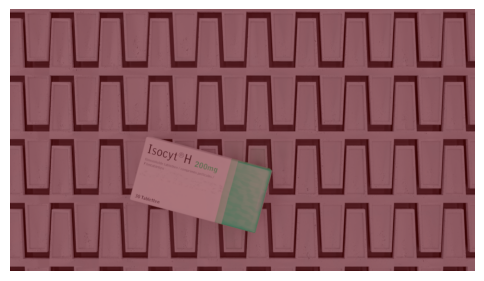

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0137037404616_top.png - Pred: 0.249


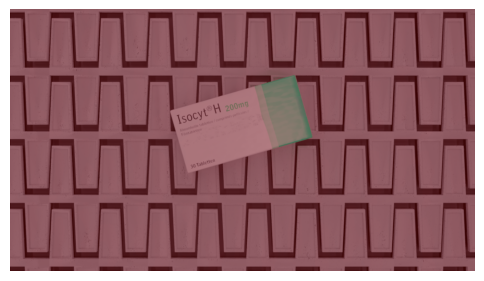

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0142348799278_top.png - Pred: 0.248


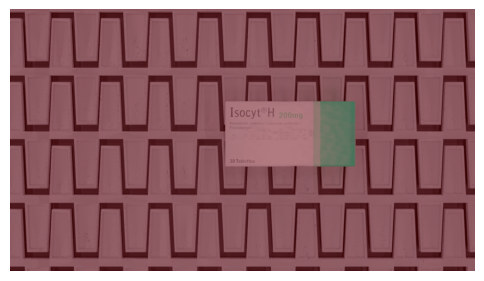

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0144714371478_top.png - Pred: 0.248


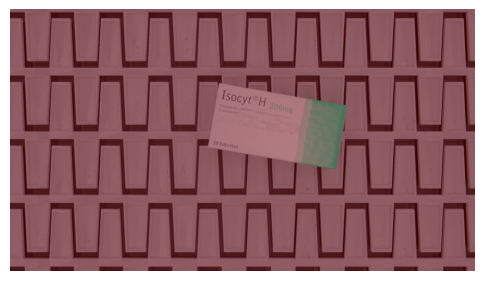

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
0167581056939_top.png - Pred: 0.243


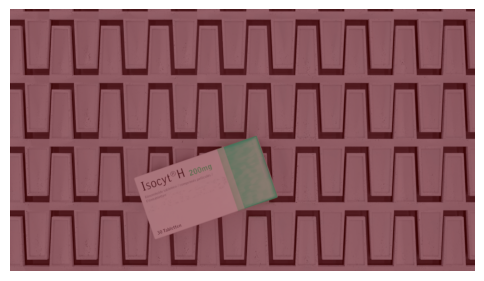

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
0193944747528_top.png - Pred: 0.245


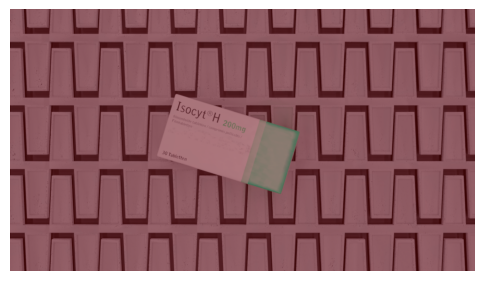

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
0198143165548_top.png - Pred: 0.251


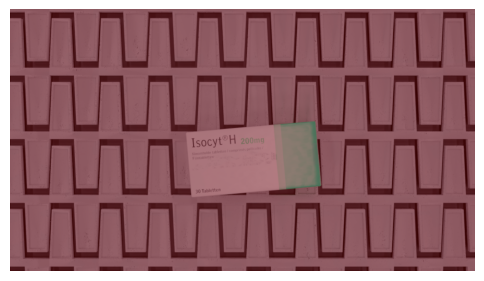

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
0203951267320_top.png - Pred: 0.243


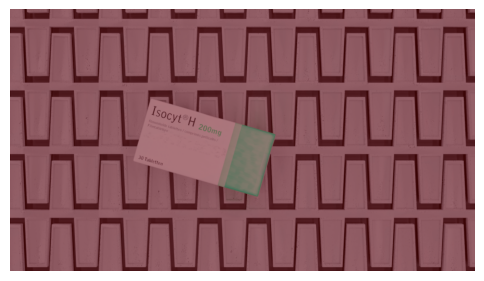

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0204572690665_top.png - Pred: 0.241


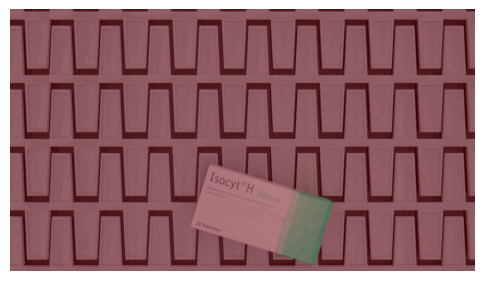

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
0240078925171_top.png - Pred: 0.243


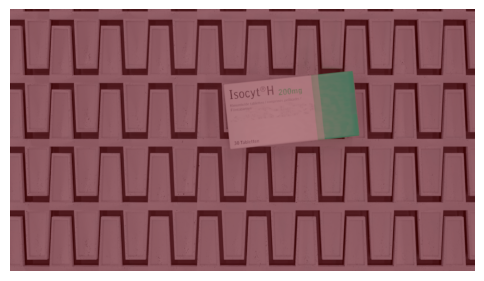

[RESULTADO FINAL] Média IoU: 0.0000 - Acima de 0.5: 0 / 10


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import xml.etree.ElementTree as ET
import cv2

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def get_last_conv_name(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("Nenhuma camada Conv2D encontrada.")

def make_gradcam_heatmap(model, img_array, last_conv_layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) + 1e-8
    return heatmap.numpy()

def extract_gt_bbox(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        return [
            int(bbox.find('xmin').text),
            int(bbox.find('ymin').text),
            int(bbox.find('xmax').text),
            int(bbox.find('ymax').text)
        ]
    return None

def heatmap_to_bbox(heatmap, threshold=0.5):
    heatmap_bin = (heatmap > threshold).astype(np.uint8) * 255
    contours, _ = cv2.findContours(heatmap_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    return [x, y, x + w, y + h]

def calculate_iou(boxA, boxB):
    if boxA is None or boxB is None:
        return None
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    iou = interArea / float(boxAArea + boxBArea - interArea + 1e-8)
    return iou

def plot_heatmap_on_image(img_path, heatmap):
    img = cv2.imread(img_path)
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# ==== EXECUÇÃO ====

image_dir = "interpretabilidade/intact/top"
xml_dir = "predict_imgs/annotations"

ious = []
for fname in os.listdir(image_dir):
    if not fname.endswith(".png"):
        continue

    img_path = os.path.join(image_dir, fname)
    xml_path = os.path.join(xml_dir, fname.replace(".png", ".xml"))

    input_tensor = load_and_preprocess_image(img_path)
    pred = model.predict(input_tensor)[0][0]
    print(f"{fname} - Pred: {pred:.3f}")

    conv_name = get_last_conv_name(model)
    heatmap = make_gradcam_heatmap(model, input_tensor, conv_name)
    plot_heatmap_on_image(img_path, heatmap)

    pred_bbox = heatmap_to_bbox(heatmap)
    gt_bbox = extract_gt_bbox(xml_path)
    iou = calculate_iou(pred_bbox, gt_bbox)
    if iou is not None:
        ious.append(iou)

mean_iou = np.mean(ious) if ious else float('nan')
print(f"[RESULTADO FINAL] Média IoU: {mean_iou:.4f} - Acima de 0.5: {sum(i >= 0.5 for i in ious)} / {len(ious)}")


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2
import xml.etree.ElementTree as ET


def generate_gradcam(model, top_input_array, side_input_array, layer_name='conv5_block3_out'):
    resnet = model.get_layer('resnet50')
    side_input_model = tf.keras.models.Model(inputs=resnet.input,
                                             outputs=[resnet.get_layer(layer_name).output, resnet.output])

    with tf.GradientTape() as tape:
        inputs = tf.convert_to_tensor(side_input_array, dtype=tf.float32)
        tape.watch(inputs)

        conv_outputs, features = side_input_model(inputs)
        x = tf.keras.layers.GlobalAveragePooling2D()(features)
        x = tf.keras.layers.Concatenate()([x, x])
        x = tf.keras.layers.Dense(128, activation='relu')(x)
        preds = tf.keras.layers.Dense(1, activation='sigmoid')(x)
        loss = preds[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-10)

    return heatmap.numpy()


def heatmap_to_bbox(heatmap, threshold_ratio=0.3):
    heatmap_rescaled = np.uint8(255 * heatmap)
    _, thresh = cv2.threshold(heatmap_rescaled, int(threshold_ratio * 255), 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None
    largest = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest)
    return (x, y, x + w, y + h)


def parse_xml_to_bbox(xml_path):
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        bbox = root.find("object").find("bndbox")
        x_min = int(bbox.find("xmin").text)
        y_min = int(bbox.find("ymin").text)
        x_max = int(bbox.find("xmax").text)
        y_max = int(bbox.find("ymax").text)
        return (x_min, y_min, x_max, y_max)
    except Exception:
        return None


def calculate_iou(box1, box2):
    if box1 is None or box2 is None:
        return 0.0
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    iou = interArea / float(box1Area + box2Area - interArea + 1e-10)
    return iou


def evaluate_interpretability(model, image_paths, xml_base_path, input_size=(224, 224)):
    ious = []
    for img_path in image_paths:
        img_name = os.path.basename(img_path)
        serial = img_name.replace(".png", "")
        xml_path = os.path.join(xml_base_path, serial + ".xml")
        if not os.path.exists(xml_path):
            print(f"[{img_name}] XML não encontrado: {xml_path}")
            continue

        img = image.load_img(img_path, target_size=input_size)
        x_side = image.img_to_array(img)
        x_side = np.expand_dims(x_side, axis=0)
        x_side = preprocess_input(x_side)

        x_top = np.zeros_like(x_side)

        heatmap_small = generate_gradcam(model, x_top, x_side)
        heatmap = cv2.resize(heatmap_small, input_size)

        pred_bbox = heatmap_to_bbox(heatmap)
        true_bbox = parse_xml_to_bbox(xml_path)
        iou = calculate_iou(pred_bbox, true_bbox)
        ious.append(iou)

        # Visualização
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.title("Imagem")

        plt.subplot(1, 3, 2)
        plt.imshow(heatmap, cmap='jet')
        plt.title("Grad-CAM")

        img_with_bbox = np.array(img)
        if pred_bbox:
            cv2.rectangle(img_with_bbox, pred_bbox[:2], pred_bbox[2:], (255, 0, 0), 2)  # pred bbox
        if true_bbox:
            cv2.rectangle(img_with_bbox, true_bbox[:2], true_bbox[2:], (0, 255, 0), 2)  # true bbox

        plt.subplot(1, 3, 3)
        plt.imshow(img_with_bbox)
        plt.title(f"IoU = {iou:.2f}")
        plt.tight_layout()
        plt.show()

    return ious


### He just seems to be smart